In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random

# I will put this in here, as it disables some warning which I find appearing even if applying the recommended solution
# changes quality is chekced on every change I do below
pd.options.mode.chained_assignment = None

<h1><center>Mobile applications research</center></h1>


<h1><center>Prepared by Petar Tsvetkov</center></h1>

<br>
<br>
<br>
<br>


### Table of content

0. Intro
1. Getting our data ready
2. Exploring our data and see how it behaves
3. Comparing initial results with additional data set
4. Summary
5. Improvement of this article
6. Resources used

<br>
<br>
<br>
<br>
<br>

### 0. Intro

Nowadays our phones are not what they used to be 20 or even 10 years ago. Calling them a smartphones right now, we are basically using them for everything - operating our banking accounts, connecting with people from all around the worlds, sport activities recommendations and others. The importance of these devices are also proved by the competition that is happening between some technology giants like Apple, Samsung, Huawei, etc.

Its fair to think of a moderd smartphone as a device which is basically allowing you to put the worlds in your pocket. However in order to achieve this, your smarphone needs a serious set up and tools like - stable and well performing operating system, smooth UX (user experience) while using the phone and an enormous set of applications - which are developed to server you best.

While we won't be talking about the initial application development, I think its fair to ask a some questions really important questions about these mobile applications - not only from user perspective, but also from a viewpoint which will be helpful (I think) for some developers aiming to create the next [Flappy Bird](https://de.wikipedia.org/wiki/Flappy_Bird) for example.

Probably the most important criteria for an application success is its rating and its downloads / installations. On top of that there are a lot of details which are making the success of an application or on the other side its failure.

In order to start this research jurney our summarize the above words in some questions and later on I will try to give my answers on them, of course with some data for support.

#### How is tha application success or failure determined and the application details are contributing to those?

#### Are there some ideas or directions to follow, which will help you to build an extremely successfull mobile application?

<br>
<br>
<br>

### 1. Getting our data ready

So we definetely need some data to review and make some conclusions about. In the Internet there is a lot of information about everything basically, so it is not that hard to find some information about mobile applications as you may think, also it tends to be quite an interesting topic for a lot of people.

I've found some datasets with information about mobile applications for the 2 most popular stores about these - Apple Store (iOS devices) and Google Store (Android devices) and I think will manage to make use of them. Of course there is the most recent store for applications of Huawei, but we won't be going that deep into the recent months innovations.

I will also try to standardize both the datasets, so that we will have the same type of information in them and do some comparsion if needed. This is a good idea, since if for example we see a tendency that the banking applications are blowing the market in both the sotres - it is probably a good idea to think of those as a successful type of applications.
It also came to my mind to concatanate these the two datasets, but I will not go with that, since there might be some duplicates, which will not give us any value added if are at one place.

Since we want to "standardize" I will firs make an initial load of the data and then step by step comparing both the datasets, I will decide what to keep and how to name the different columns. I hope that there will be some common columns. I will try to at least have some columns with the same name.

#### Apple Store

In [3]:
apple_store_data = pd.read_csv('./data/apple_store_data.csv', index_col=0)

In [4]:
apple_store_data.sample(10)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
9787,1139146156,【謎解き推理】意味が分かると怖い話-この怖い話を謎解き、怪談を読み解けるか…,35741696,USD,0.00,0,0,0.0,0.0,1.0.4,12+,Book,37,0,1,1
1553,528919633,"Seeds Pro For Minecraft - Server, Skins, Commu...",29258752,USD,1.99,12770,18,4.5,3.5,8.0.5,9+,Games,40,5,1,1
3380,900721327,EA SPORTS™ UFC®,985080832,USD,0.00,19354,408,4.5,4.5,1.9.3,12+,Games,38,5,10,1
2868,802889610,Tricks for iPhone (Pro),22793216,USD,1.99,0,0,0.0,0.0,2.5,4+,Utilities,37,5,2,1
10664,1171578327,大话问仙 - 与众不同的萌派仙侠回合游戏体验(送神器),187321344,USD,0.00,1,1,5.0,5.0,1.0,9+,Games,38,5,1,1
4438,981633844,Block Craft 3D: Building Simulator Game For Free,93063168,USD,0.00,78412,11001,4.5,5.0,2.3.2,4+,Games,37,5,9,1
734,409299054,SecurityCam for iPhone,10469376,USD,0.99,6,1,1.0,1.0,1.131,4+,Photo & Video,39,0,2,1
1003,447689011,Infinity Blade II,1344401408,USD,0.99,153588,595,4.5,4.5,1.3.4,12+,Games,40,5,16,1
3528,914517987,Retouch Vogue - Facetune Wrinkles & Pimples Ma...,25153536,USD,0.00,2235,220,4.5,4.0,1.5,4+,Photo & Video,38,0,30,1
3295,891755554,Sago Mini Toolbox,146458624,USD,2.99,65,6,3.5,4.0,1.7,4+,Education,38,5,1,1


##### Columns description

"id" : App ID

"track_name": App Name

"size_bytes": Size (in Bytes)

"currency": Currency Type

"price": Price amount

"ratingcounttot": User Rating counts (for all version)

"ratingcountver": User Rating counts (for current version)

"user_rating" : Average User Rating value (for all version)

"userratingver": Average User Rating value (for current version)

"ver" : Latest version code

"cont_rating": Content Rating

"prime_genre": Primary Genre

"sup_devices.num": Number of supporting devices

"ipadSc_urls.num": Number of screenshots showed for display

"lang.num": Number of supported languages

"vpp_lic": Vpp Device Based Licensing Enabled

#### Google Play Store

In [5]:
google_play_store = pd.read_csv('./data/google_play_store_data.csv')

In [6]:
google_play_store.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
990,Laugh Out Loud by Kevin Hart,ENTERTAINMENT,4.3,1856,20M,"100,000+",Free,0,Teen,Entertainment,"August 1, 2018",1.6.1,6.0 and up
9766,ER Assist,PRODUCTIVITY,5.0,3,28M,10+,Free,0,Everyone,Productivity,"December 6, 2016",0.1.7,4.1 and up
5595,Choices: Stories You Play,FAMILY,4.6,807155,93M,"10,000,000+",Free,0,Teen,Simulation,"July 30, 2018",2.3.5,4.0.3 and up
106,Tie - Always be happy,BEAUTY,4.7,964,9.0M,"50,000+",Free,0,Everyone,Beauty,"June 21, 2018",4.0,4.2 and up
124,"Sticker Camera - Selfie Filters, Beauty Camera",BEAUTY,3.9,2277,22M,"500,000+",Free,0,Everyone,Beauty,"July 12, 2018",1.1.0,4.0.3 and up
2681,Jabong Online Shopping App,SHOPPING,4.1,367290,11M,"10,000,000+",Free,0,Everyone,Shopping,"July 20, 2018",4.9.3,4.0.3 and up
7854,Philips IQon Spectral CT Fundamentals.,MEDICAL,NaN,2,77M,100+,Free,0,Everyone,Medical,"September 21, 2017",1.0.0,4.0 and up
6270,Sisense Mobile BI,BUSINESS,4.9,23,28M,"1,000+",Free,0,Everyone,Business,"April 30, 2018",2.4.1,4.1 and up
10288,FD Community FCU Mobile,FINANCE,4.7,175,12M,"1,000+",Free,0,Everyone,Finance,"June 12, 2018",5.9.1.0,5.0 and up
5639,Five Nights at Neighbor House,GAME,4.2,2180,55M,"100,000+",Free,0,Everyone 10+,Action,"January 26, 2018",1.1.0,4.2 and up


##### Columns description

"App": Application name

"Category": Category the app belongs to

"Rating": Overall user rating of the app (as when scraped)

"Revies": Number of user reviews for the app (as when scraped)

"Size": Size of the app (as when scraped)

"Installs": Number of user downloads/installs for the app (as when scraped)

"Type": Paid or Free

"Price": Price of the app (as when scraped)

"Content Rating": Age group the app is targeted at - Children / Mature 21+ / Adult

"Genres": An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family

So we definetely see that we have some columns in common like the category / genre, price, rating, size. I will try to adjust these, change some names and apply some modifications. For example we do not really need a column to indicate if the app. is free or not, when we can say if it has a price of 0 - it is free. In the Apple store data we are also having a lot of ratings, which are also described in the ./data/apple_store_data_descr.txt and things like that.

<br>
<br>
<br>

From here we are starting with some data transformations. We will try to "fix" the data we have in both the data sets and prepare it for further analysis. It may not look really needed right now, but it will save us a ton of effort later on - when we start on extracting conclusions from these. 

We will first prepare the Google Play store data and then we will proceed with the Apple Store.

<br>
<br>
<br>

In [7]:
google_play_store

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [8]:
del google_play_store['Type']

In [9]:
google_play_store.columns = ['app_name', 'category', 'rating', 'num_of_reviews', 'size', 'installs', 'price',
                             'content_rating', 'genre', 'last_update', 'current_version', 'android_version']

In [10]:
google_play_store.columns

Index(['app_name', 'category', 'rating', 'num_of_reviews', 'size', 'installs',
       'price', 'content_rating', 'genre', 'last_update', 'current_version',
       'android_version'],
      dtype='object')

In [11]:
google_play_store.head(2)

,app_name,category,rating,num_of_reviews,size,installs,price,content_rating,genre,last_update,current_version,android_version
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [12]:
google_play_store.dtypes

app_name            object
category            object
rating             float64
num_of_reviews      object
size                object
installs            object
price               object
content_rating      object
genre               object
last_update         object
current_version     object
android_version     object
dtype: object

We are also interesting into having the columns in the correct format. Since probably the "object" format is coming from some rows which are having string symbols or something like that - if we find such and they are with a meaningful low count - we will simply get rid of them. Will get this done column by column, where needed.

This one is using a search with a regex on the num_of_reviews column that is having some symbols different from number
Looks like we have only 1 rows so we will remove it and transford

In [13]:
google_play_store[google_play_store['num_of_reviews'].str.contains('\D+')]

,app_name,category,rating,num_of_reviews,size,installs,price,content_rating,genre,last_update,current_version,android_version
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
google_play_store = google_play_store[~google_play_store['num_of_reviews'].str.contains('\D+')]

In [15]:
google_play_store[google_play_store['num_of_reviews'].str.contains('\D+')]

,app_name,category,rating,num_of_reviews,size,installs,price,content_rating,genre,last_update,current_version,android_version


In [16]:
google_play_store['num_of_reviews'] = google_play_store['num_of_reviews'].astype(int)

All of the unique sizes we have - ultimately we need to fix those
Looking at the size they seem to be in bytes

In [17]:
google_play_store['size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [18]:
google_play_store.dtypes

app_name            object
category            object
rating             float64
num_of_reviews       int32
size                object
installs            object
price               object
content_rating      object
genre               object
last_update         object
current_version     object
android_version     object
dtype: object

We are applying some modifications for these "M"s and "k"s turning them to millions and thousands

In [19]:
google_play_store['size'] = google_play_store['size'].apply(lambda size: float(size[:-1]) * 1000000 if 'M' in size 
                                          else (float(size[:-1]) * 100000 if 'k' in size else size))

# google_play_store.loc[:, 'size'] = google_play_store['size'].apply(lambda size: float(size[:-1]) * 1000000 if 'M' in size 
#                                           else (float(size[:-1]) * 100000 if 'k' in size else size))

In [20]:
# We will replace this 'Varies with device' with -1, so that we can stick to the int type for the column

google_play_store['size'][google_play_store['size'] == 'Varies with device'] = -1

In [21]:
google_play_store['size'][google_play_store['size'] == 'Varies with device']

Series([], Name: size, dtype: object)

In [22]:
google_play_store['size'] = google_play_store['size'].astype(int)

In [23]:
google_play_store.dtypes

app_name            object
category            object
rating             float64
num_of_reviews       int32
size                 int32
installs            object
price               object
content_rating      object
genre               object
last_update         object
current_version     object
android_version     object
dtype: object

In [24]:
google_play_store['installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

Removing the "+" signs and then removing all the "," as well
Casting to int at the end

In [25]:
google_play_store['installs'] = google_play_store['installs'].apply(lambda installs: installs[:-1] if '+' in installs 
                                                                    else installs)

In [26]:
google_play_store['installs'] = google_play_store['installs'].str.replace(',', '')

In [27]:
google_play_store['installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [28]:
google_play_store['installs'] = google_play_store['installs'].astype(int)

In [29]:
google_play_store['price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

We need to remove this dollar signs and just turn these values in to a dollar value with a float like format.

In [30]:
google_play_store['price'] = google_play_store['price'].apply(lambda price: price[1:] if '$' in price 
                                                                    else price)

In [31]:
google_play_store['price'] = google_play_store['price'].astype(float)

In [32]:
google_play_store.dtypes

app_name            object
category            object
rating             float64
num_of_reviews       int32
size                 int32
installs             int32
price              float64
content_rating      object
genre               object
last_update         object
current_version     object
android_version     object
dtype: object

Looking at the content of the "genre" and "content_rating" we will leave these unchanged for now.

We will try to turn the dates into "real" dates and then remove / fix some long string values in the "current_version" and "android_version"

In [33]:
# Turning these into datetime format from pandas

google_play_store['last_update'] = pd.to_datetime(google_play_store['last_update'])

In [34]:
google_play_store['android_version']

0              4.0.3 and up
1              4.0.3 and up
2              4.0.3 and up
3                4.2 and up
4                4.4 and up
                ...        
10836            4.1 and up
10837            4.1 and up
10838            2.2 and up
10839    Varies with device
10840    Varies with device
Name: android_version, Length: 10840, dtype: object

In [35]:
google_play_store['current_version']

0                     1.0.0
1                     2.0.0
2                     1.2.4
3        Varies with device
4                       1.1
                ...        
10836                  1.48
10837                   1.0
10838                   1.0
10839    Varies with device
10840    Varies with device
Name: current_version, Length: 10840, dtype: object

In [36]:
google_play_store['current_version'][google_play_store['current_version'] == 'Varies with device'] = -1
google_play_store['android_version'][google_play_store['android_version'] == 'Varies with device'] = -1

In [37]:
google_play_store.sample(10)

,app_name,category,rating,num_of_reviews,size,installs,price,content_rating,genre,last_update,current_version,android_version
6211,OnTrack Diabetes,MEDICAL,4.3,6079,1800000,500000,0.0,Everyone,Medical,2018-01-17,3.2.7,2.1 and up
944,HBO NOW: Stream TV & Movies,ENTERTAINMENT,3.9,61201,-1,10000000,0.0,Teen,Entertainment,2018-07-19,-1,-1
10038,GO Launcher EX UI5.0 theme,PERSONALIZATION,4.3,111634,13000000,5000000,0.0,Everyone,Personalization,2014-05-26,2.08,2.0 and up
10083,EY Expenses,FINANCE,NaN,0,10000000,1000,0.0,Everyone,Finance,2018-07-09,1.1,4.1 and up
7813,Counter Online FPS Game,GAME,4.2,41089,42000000,5000000,0.0,Teen,Action,2018-07-25,2.7,4.1 and up
142,Wikipedia,BOOKS_AND_REFERENCE,4.4,577550,-1,10000000,0.0,Everyone,Books & Reference,2018-08-02,-1,-1
10555,FK Jonava,SPORTS,NaN,1,26000000,5,0.0,Everyone,Sports,2018-02-21,1.0,4.1 and up
2957,BeautyPlus - Easy Photo Editor & Selfie Camera,PHOTOGRAPHY,4.4,3158151,53000000,100000000,0.0,Everyone,Photography,2018-07-31,6.9.031,4.1 and up
3853,SBB Mobile,MAPS_AND_NAVIGATION,3.7,20605,-1,1000000,0.0,Everyone,Maps & Navigation,2018-08-06,-1,-1
804,Learn English with Aco,EDUCATION,4.6,75112,6500000,1000000,0.0,Everyone,Education,2017-11-11,2.09,4.1 and up


In [38]:
google_play_store.dtypes

app_name                   object
category                   object
rating                    float64
num_of_reviews              int32
size                        int32
installs                    int32
price                     float64
content_rating             object
genre                      object
last_update        datetime64[ns]
current_version            object
android_version            object
dtype: object

Will finalize this dataset with some column renames for, so that we will be sure no missunderstanding will happen.

In [39]:
google_play_store = google_play_store.rename(columns = {'size':'size_bytes'})
google_play_store = google_play_store.rename(columns = {'price':'price_usd'})

In [40]:
google_play_store.columns

Index(['app_name', 'category', 'rating', 'num_of_reviews', 'size_bytes',
       'installs', 'price_usd', 'content_rating', 'genre', 'last_update',
       'current_version', 'android_version'],
      dtype='object')

Finally we will remove some duplicate rows based on the application name, since while manually revewing the data I've found there are some - example is with the Facebook app - it is clear that the duplicate rows do look to have the same kind of information so granularity on application name only will work for now.

In [41]:
google_play_store[google_play_store['app_name'] == 'Facebook']

,app_name,category,rating,num_of_reviews,size_bytes,installs,price_usd,content_rating,genre,last_update,current_version,android_version
2544,Facebook,SOCIAL,4.1,78158306,-1,1000000000,0.0,Teen,Social,2018-08-03,-1,-1
3943,Facebook,SOCIAL,4.1,78128208,-1,1000000000,0.0,Teen,Social,2018-08-03,-1,-1


In [42]:
google_play_store[google_play_store['app_name'] == 'Instagram']

,app_name,category,rating,num_of_reviews,size_bytes,installs,price_usd,content_rating,genre,last_update,current_version,android_version
2545,Instagram,SOCIAL,4.5,66577313,-1,1000000000,0.0,Teen,Social,2018-07-31,-1,-1
2604,Instagram,SOCIAL,4.5,66577446,-1,1000000000,0.0,Teen,Social,2018-07-31,-1,-1
2611,Instagram,SOCIAL,4.5,66577313,-1,1000000000,0.0,Teen,Social,2018-07-31,-1,-1
3909,Instagram,SOCIAL,4.5,66509917,-1,1000000000,0.0,Teen,Social,2018-07-31,-1,-1


In [43]:
google_play_store = google_play_store.drop_duplicates(subset=['app_name', 'price_usd'])

In [44]:
# Now we have some rows removed

google_play_store

,app_name,category,rating,num_of_reviews,size_bytes,installs,price_usd,content_rating,genre,last_update,current_version,android_version
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,0.0,Teen,Art & Design,2018-06-08,-1,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000,5000,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000,100,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500000,1000,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,-1,1000,0.0,Mature 17+,Books & Reference,2015-01-19,-1,-1


<br>
<br>
<br>

We will consider the Google Play store data good for now. In the next lines if we find some other change needed, we will apply it on the fly. Some of the changes are not really critical, but it is really good to keep the data in a "good shape" and good visibility.

I would also like to highlight something about the Google Play store data. In here we do not mantain a specific item ID from the store itself - we are only having the index which is on the data frame object. For these apps in here we do have a file which is giving us some user reviews, but in there we do not have any ID - only application names. That said it is not really needed to do some additional work into giving some kind of hash or ID for the items in here. Later on if I proceed on working with the user reviews also - I will just match them by name.

So lets check now the Apple Store data and try to bring it in a "good shape".

For the Apple store data we have a custom IDs from the data. This is usually really helpful, since we can connect those to some additional files, if we have such. For this particular case and data, I've found only a description file in addition to the Apple store data, which is only giving us a short description of the application + the size of it. With rest of the data that we have already imported I don't find this description really useful, so for now I will just remove this custom ID column.

In [45]:
del apple_store_data['id']

In [46]:
apple_store_data.sample(10)

,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
3474,Leap of Fate,999398400,USD,3.99,280,280,4.5,4.5,1.0,12+,Games,38,5,1,1
5397,謎解き母からのメモ,21292032,USD,0.00,0,0,0.0,0.0,1.0.18,4+,Book,37,0,1,1
7529,Devil Tower 2,101798912,USD,0.99,0,0,0.0,0.0,2.0.2,9+,Games,38,4,2,1
9711,Escape from the beach house of everlasting sum...,97858560,USD,0.00,3,3,4.5,4.5,1.0.1,4+,Games,38,5,1,1
5060,wetter.com,192418816,USD,0.00,0,0,0.0,0.0,1.15.0,4+,Weather,37,5,2,1
3730,Astrå,215661568,USD,0.99,42,2,4.0,2.0,1.1.2,4+,Games,38,5,1,1
4637,Hop Rush,11702272,USD,0.00,9,9,1.0,1.0,1.5,4+,Games,40,2,1,1
1139,"Adobe Acrobat Reader: View, Create, & Convert ...",81007616,USD,0.00,20069,33,4.0,4.5,17.05.23,4+,Business,37,5,19,1
9969,Idle Armies,77953024,USD,0.00,2015,26,4.5,5.0,1.175,12+,Games,37,5,1,1
3661,Ohajiki Web Browser,45042688,USD,2.99,9,0,4.5,0.0,2.6.4,17+,Health & Fitness,37,4,2,1


Looking at the Apple data no I think it is a good point to try and see the different currencies. If we have anything different than USD we can remove it and ignore until now, or try to apply some kind of currency conversion if we want to stick to USD only. The reason is clear - we had only USD in the Google store data.

In [47]:
apple_store_data['currency'].unique()

array(['USD'], dtype=object)

As it looks to be only USD, it is safe to remove this column as well and simply apply the same name for the price -> price_usd - same that we have in the Google store data.

In [48]:
del apple_store_data['currency']

In [49]:
# We can directly convert to the correct format

apple_store_data['price'] = apple_store_data['price'].astype(float)

I think it is also good to apply some renames in here. For example the track name can be only app_name - what we had previously, etc. We do have actually tracks for Apple phones, but since I consider this column name more suitable for a data coming from iTunes and not Apple store - I will just rely on the fact that we are working with application data mostly.


In [50]:
# Lets apply only these for now

apple_store_data = apple_store_data.rename(columns = {'track_name':'app_name'})
apple_store_data = apple_store_data.rename(columns = {'price':'price_usd'})

In [51]:
apple_store_data.sample(2)

,app_name,size_bytes,price_usd,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1642,Tiny Wings HD,28681216,2.99,12181,76,4.5,4.5,2.2,4+,Games,24,5,6,1
9066,NBAmoji,12728320,0.00,89,0,3.5,0.0,1.5.2,4+,Sports,37,5,1,1


What is interesting in here is that we have a couple of rating columns. Since we had a single and clear rating column in the Google Play store data, it makes sense to think of a little clearance in here also. However as the rating is kind of a critical data (remember we have mentioned that in the beginning) it is probably not a good idea to go with directly remove it. As of now I am thinking mostly on giving these a meaningful names, that we can easily use further then, and also correct the formatings and worng data, if there is any.

Let dive into this.

So based on the description we have, here are the details of the rating related columns:

rating_count_tot - number of user rating count for all the versions the application has had

rating_count_ver - number of user rating count for the current version of the application

user_rating - average user rating for all of the versions

user_rating_ver - average user rating for the current version of the app

cont_rating - content rating

In [52]:
# Lets adjust the little these names

apple_store_data = apple_store_data.rename(columns = {'rating_count_tot':'rating_count_all'})
apple_store_data = apple_store_data.rename(columns = {'rating_count_ver':'rating_count_version'})
apple_store_data = apple_store_data.rename(columns = {'user_rating':'user_rating_all'})
apple_store_data = apple_store_data.rename(columns = {'user_rating_ver':'user_rating_version'})
apple_store_data = apple_store_data.rename(columns = {'cont_rating':'content_rating'})
apple_store_data = apple_store_data.rename(columns = {'ver':'current_version'})

In [53]:
apple_store_data.dtypes

app_name                 object
size_bytes                int64
price_usd               float64
rating_count_all          int64
rating_count_version      int64
user_rating_all         float64
user_rating_version     float64
current_version          object
content_rating           object
prime_genre              object
sup_devices.num           int64
ipadSc_urls.num           int64
lang.num                  int64
vpp_lic                   int64
dtype: object

Looking at the types and they actually do look quite good for these columns. We can proceed with rest of the columns and finish with organizing this data set for now.


In [54]:
# Will leave this only genre, since we do not have any other column for this and also that is the name we already used

apple_store_data = apple_store_data.rename(columns = {'prime_genre':'genre'})

Moving down based on the description again, here is what I found for the column left:

"sup_devices.num": Number of supporting devices

"ipadSc_urls.num": Number of screenshots showed for display

"lang.num": Number of supported languages

"vpp_lic": Vpp Device Based Licensing Enabled

They seem to be not so bad, so instead of giving them more "pytonic" names, I think it won't cause any issues if we keep them in the data set.

In [55]:
apple_store_data = apple_store_data.rename(columns = {'sup_devices.num':'sup_devices_num'})
apple_store_data = apple_store_data.rename(columns = {'ipadSc_urls.num':'display_screenshots_num'})
apple_store_data = apple_store_data.rename(columns = {'lang.num':'sup_lng_num'})
apple_store_data = apple_store_data.rename(columns = {'vpp_lic':'vpp_licensing'})

In [56]:
apple_store_data.sample(2)

,app_name,size_bytes,price_usd,rating_count_all,rating_count_version,user_rating_all,user_rating_version,current_version,content_rating,genre,sup_devices_num,display_screenshots_num,sup_lng_num,vpp_licensing
2811,赤ペン 提出カメラ,22713344,0.0,0,0,0.0,0.0,3.2,4+,Education,36,5,1,1
1091,Fitbit,132913152,0.0,90496,399,4.0,3.5,2.36,4+,Health & Fitness,37,0,9,1


In [57]:
apple_store_data.dtypes

app_name                    object
size_bytes                   int64
price_usd                  float64
rating_count_all             int64
rating_count_version         int64
user_rating_all            float64
user_rating_version        float64
current_version             object
content_rating              object
genre                       object
sup_devices_num              int64
display_screenshots_num      int64
sup_lng_num                  int64
vpp_licensing                int64
dtype: object

It think it is fair to consider the data a little bit better for now. We've spent some lines of code and explanations about fixing data types, column names and overall format. However what I've noticed during working with both the sets of data is something interesting for the content_rating column. This information seems to be availble in both the data sets, but in not the same format. Since we wanted to standardize these sources of data, I think I can try to at least fix little where needed in these 2 columns. 

Lets take a look.

In [58]:
apple_store_data['content_rating'].unique()

array(['4+', '12+', '17+', '9+'], dtype=object)

In [59]:
google_play_store['content_rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

Its kind of a more descriptive in the Google data, but I don't think it is really helpful though. For example "Everyone" appears to be with no age selection, while we have it also in a format like "Everyone 10+", does that mean we can have multiple types of "Everyone" - with an age limitation and without such? I think we will need to apply some king of interpretation about these.

For the "Unrated" ones, we can use the technical marker from before "-1", for the "Everyone" only, since we do not have any age limitation - we can specify it as 0+ only and for the "Teen", as per definition teen age is between 13-19 years, so we can put it with 13+ only as we do not have interval for rest of the values.

In [60]:
# I will make these one by one, so that we do not go into 3-4 layer if-else blocks, it could be hard to read

google_play_store['content_rating'] = google_play_store['content_rating'].apply(lambda content_rating: '0+' if content_rating == 'Everyone'
                                                                    else content_rating)

google_play_store['content_rating'] = google_play_store['content_rating'].apply(lambda content_rating: '13+' if content_rating == 'Teen'
                                                                    else content_rating)

google_play_store['content_rating'] = google_play_store['content_rating'].apply(lambda content_rating: '10+' if content_rating == 'Everyone 10+'
                                                                    else content_rating)

google_play_store['content_rating'] = google_play_store['content_rating'].apply(lambda content_rating: '17+' if content_rating == 'Mature 17+'
                                                                    else content_rating)

google_play_store['content_rating'] = google_play_store['content_rating'].apply(lambda content_rating: '18+' if content_rating == 'Adults only 18+'
                                                                    else content_rating)

google_play_store['content_rating'] = google_play_store['content_rating'].apply(lambda content_rating: '-1' if content_rating == 'Unrated'
                                                                    else content_rating)

In [61]:
google_play_store['content_rating'].unique()

array(['0+', '13+', '10+', '17+', '18+', '-1'], dtype=object)


While it is still not that perfed, we can at least see that the plain text is gone, so it is more intuitive when looking for this column values in both the data sets.

Another thing that will be helpful is the versions values we have. During the above lines, these seems to be in object like format, which is probably because of the fact we have some string characters in there. For both the data sets we have columns for the current / latest versions. So lets take a look at these and try to turn them into numbers if possible.

In [62]:
apple_store_data['current_version'].unique()

array(['6.3.5', '8.2.2', '5.0.0', ..., '6.1.13', '0.6.41', '2.0.20.1'],
      dtype=object)

In [63]:
apple_store_data['current_version'].sample(10)

6459        1.2
4430     1.0.11
4036      3.0.0
3478        1.3
69       8.21.0
2424    2.10.14
5158     2.28.0
7362        1.3
4042      3.4.0
5169        1.4
Name: current_version, dtype: object

In [64]:
apple_store_data['app_name'].count()

7197

In [65]:
apple_store_data['app_name'].unique

<bound method Series.unique of 1                                          PAC-MAN Premium
2                                Evernote - stay organized
3          WeatherBug - Local Weather, Radar, Maps, Alerts
4        eBay: Best App to Buy, Sell, Save! Online Shop...
5                                                    Bible
                               ...                        
11081                                                Kubik
11082                                    VR Roller-Coaster
11087                Bret Michaels Emojis + Lyric Keyboard
11089            VR Roller Coaster World - Virtual Reality
11097                         Escape the Sweet Shop Series
Name: app_name, Length: 7197, dtype: object>

It is important to check whether we have some application names which are present more than once. If that is the case it could be possible that we have information for an application with 2 versions of it. Luckily - we see that the overall application names count == distinct application names == 7197.



So in here these look to be quite messy. In order to change their types, we will need to apply some kind of transformation. I really want to see these in some kind of plot further, so I think we can try to. For example do we really need a version like 1.72.1? Since we do not have repeatable application names and versions respectively - we can just use this as 1.72 for example. This could be done I think in 2 easy steps, so lets give it a try.

In [66]:
# Ensuring the first cut will get everything that we need

apple_store_data['current_version'] = apple_store_data['current_version'].apply(lambda ver: ver[0:4])

In [67]:
apple_store_data['current_version'].unique()

array(['6.3.', '8.2.', '5.0.', '5.10', '7.5.', '1.8', '6.12', '8.4.',
       '3.6.', '4.0.', '4.10', '5.19', '27.0', '7.3.', '21.1', '95.0',
       '11.1', '11.0', '1.0.', '3.3', '5.2.', '6.9', '9.0.', '2.1.',
       '2.0.', '10.5', '1.9.', '3.4.', '9.1.', '9.6', '5.0', '5.5.',
       '7.2', '8.0.', '2.4', '5.2', '1.7.', '3.8.', '6.19', '2.9.',
       '3.9.', '7.1.', '3.5.', '7.0', '4.8.', '4.56', '7.2.', '8.11',
       '2.5.', '10.1', '9.30', '7.1', '8.21', '1.1.', '9.10', '1.5.',
       '7.0.', '2.61', '4.1.', '6.3', '6.2.', '24.2', '10.4', '5.9.',
       '5.16', '4.3', '5.1.', '1.48', '5.4.', '8.5.', '3.2.', '5.11',
       '3.3.', '2.29', '17.0', '1.7', '6.35', '8.6', '5.1', '17.5',
       '11.2', '8.7.', '3.6', '10.2', '7.4', '4.9.', '2.8.', '3.17',
       '6.52', '9.9', '1.8.', '5.3', '7.7.', '4.6.', '2.17', '1.2.',
       '2.3.', '3.55', '3.0.', '4.5.', '12.2', '7.32', '1.41', '4.5',
       '1.12', '2.01', '4.6', '5.7.', '1.4.', '2.89', '1.1', '1.5', '8.1',
       '11.9', '8.3.',

In [68]:
# Lets proceed further with some "v" and "V" at the beginning + some dots that we've left at the end

apple_store_data['current_version'] = apple_store_data['current_version'].apply(lambda ver: ver[1:] if ver[0] in ('v', 'V')
                                                                               else (ver[:-1] if ver[-1] == '.' else ver))

apple_store_data['current_version'] = apple_store_data['current_version'].str.replace(',', '.')

In [69]:
apple_store_data['current_version'].unique()

array(['6.3', '8.2', '5.0', '5.10', '7.5', '1.8', '6.12', '8.4', '3.6',
       '4.0', '4.10', '5.19', '27.0', '7.3', '21.1', '95.0', '11.1',
       '11.0', '1.0', '3.3', '5.2', '6.9', '9.0', '2.1', '2.0', '10.5',
       '1.9', '3.4', '9.1', '9.6', '5.5', '7.2', '8.0', '2.4', '1.7',
       '3.8', '6.19', '2.9', '3.9', '7.1', '3.5', '7.0', '4.8', '4.56',
       '8.11', '2.5', '10.1', '9.30', '8.21', '1.1', '9.10', '1.5',
       '2.61', '4.1', '6.2', '24.2', '10.4', '5.9', '5.16', '4.3', '5.1',
       '1.48', '5.4', '8.5', '3.2', '5.11', '2.29', '17.0', '6.35', '8.6',
       '17.5', '11.2', '8.7', '10.2', '7.4', '4.9', '2.8', '3.17', '6.52',
       '9.9', '5.3', '7.7', '4.6', '2.17', '1.2', '2.3', '3.55', '3.0',
       '4.5', '12.2', '7.32', '1.41', '1.12', '2.01', '5.7', '1.4',
       '2.89', '8.1', '11.9', '8.3', '3.1', '2.6', '0.39', '1.45', '1.04',
       '4.24', '114', '9.3', '6.06', '6.4', '1.6', '50.2', '4.02', '10.9',
       '1.3', '9.5', '5', '2.31', '10.0', '6.79', '22', 'iOV ',

We still do have some non sense values so we will give them a default count first and if they are not really significant, we will just remove them.

In [70]:
# These are only 2, so we can go on and remove them

apple_store_data[apple_store_data['current_version'].str.contains('[a-zA-Z]')]


,app_name,size_bytes,price_usd,rating_count_all,rating_count_version,user_rating_all,user_rating_version,current_version,content_rating,genre,sup_devices_num,display_screenshots_num,sup_lng_num,vpp_licensing
254,iOvilus,9946112,1.99,381,6,3.0,2.0,iOV,12+,Entertainment,38,0,1,1
5215,Strawberry Shortcake Candy Garden,232399872,0.00,633,633,4.5,4.5,Upda,4+,Entertainment,39,5,10,1


In [71]:
apple_store_data = apple_store_data[~apple_store_data['current_version'].str.contains('[a-zA-Z]')]

In [72]:
apple_store_data['current_version'] = apple_store_data['current_version'].astype(float)

In [73]:
apple_store_data['current_version'].dtype

dtype('float64')

In [74]:
apple_store_data.dtypes

app_name                    object
size_bytes                   int64
price_usd                  float64
rating_count_all             int64
rating_count_version         int64
user_rating_all            float64
user_rating_version        float64
current_version            float64
content_rating              object
genre                       object
sup_devices_num              int64
display_screenshots_num      int64
sup_lng_num                  int64
vpp_licensing                int64
dtype: object

Lets quickly check the Google data as well.

In [75]:
google_play_store.dtypes

app_name                   object
category                   object
rating                    float64
num_of_reviews              int32
size_bytes                  int32
installs                    int32
price_usd                 float64
content_rating             object
genre                      object
last_update        datetime64[ns]
current_version            object
android_version            object
dtype: object

In here we have an Android version and the current version. Maybe we can try to fix both of these in case we need the Android version for something else further.

In [76]:
google_play_store['current_version'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [77]:
# # We can use the same trasnformation

google_play_store['current_version'] = google_play_store['current_version'].apply(lambda ver: ver[0:4] if type(ver) is str
                                                                                  else ver)

google_play_store['current_version'] = google_play_store['current_version'].apply(lambda ver: ver[:-1] if type(ver) is str
                                                                                 and ver[-1] == '.' else ver)



We have some rows which contain really messy string symbols in these version and it will be really hard to fix them all as they are looking quite custom. Since they are not so significant compared to the whole data set, we will remove them.



In [78]:
google_play_store = google_play_store[~google_play_store['current_version'].str.contains('[a-zA-Z]', na=False)]

We have some NaNs, which are really low count so we will remove those. Also working on removing problematic characters, which will cause an error in the pre-formating finally.

In [79]:
google_play_store = google_play_store[~google_play_store['current_version'].isna()]

In [80]:
google_play_store = google_play_store[~google_play_store['current_version'].str.contains('[()\-_]', na=False)]

In [81]:
google_play_store['current_version'] = google_play_store['current_version'].str.replace(',', '.')
google_play_store['current_version'] = google_play_store['current_version'].str.replace(';', '.')
google_play_store['current_version'] = google_play_store['current_version'].str.replace('|', '.')

In [82]:
google_play_store['current_version'] = google_play_store['current_version'].astype(float)

In [83]:
google_play_store.dtypes

app_name                   object
category                   object
rating                    float64
num_of_reviews              int32
size_bytes                  int32
installs                    int32
price_usd                 float64
content_rating             object
genre                      object
last_update        datetime64[ns]
current_version           float64
android_version            object
dtype: object

Quickly fixing the android version as well. In there it is much more easier as the unique values are quite less. Applying some of the previous fixtures and we are done.

In [84]:
google_play_store['android_version'] = google_play_store['android_version'].str.replace('[a-zA-Z]', '')

In [85]:
google_play_store['android_version'] = google_play_store['android_version'].apply(lambda ver: ver[0:4] if type(ver) is str
                                                                                  else ver)

In [86]:
google_play_store['android_version'] = google_play_store['android_version'].apply(lambda ver: ver[:-1] if type(ver) is str
                                                                                 and ver[-1] == '.' else ver)

In [87]:
google_play_store['android_version'] = google_play_store['android_version'].astype(float)

We have some NaNs in the current_version and android_version, but they are looking to be around 10% from the total data we have. Since I am not sure if this will be a critical column for the further analysis, I will just leave these as they are and do not remove them. Later on if we need to have them removed, I will get this done.

While working with the data in here I've also decided to convert the size we have at the moment into megabytes instead of bytes only. This will be more useful probably later on.

In [88]:
apple_store_data['size_bytes'] = apple_store_data['size_bytes'] / 1048576
google_play_store['size_bytes'] = google_play_store['size_bytes'] / 1048576

In [89]:
google_play_store = google_play_store.rename(columns = {'size_bytes':'size_mb'})
apple_store_data = apple_store_data.rename(columns = {'size_bytes':'size_mb'})

In [90]:
google_play_store.dtypes

app_name                   object
category                   object
rating                    float64
num_of_reviews              int32
size_mb                   float64
installs                    int32
price_usd                 float64
content_rating             object
genre                      object
last_update        datetime64[ns]
current_version           float64
android_version           float64
dtype: object

In [91]:
apple_store_data.dtypes

app_name                    object
size_mb                    float64
price_usd                  float64
rating_count_all             int64
rating_count_version         int64
user_rating_all            float64
user_rating_version        float64
current_version            float64
content_rating              object
genre                       object
sup_devices_num              int64
display_screenshots_num      int64
sup_lng_num                  int64
vpp_licensing                int64
dtype: object

### 2. Exploring our data and see how it behaves

So in this section we generally want to see how our data does look like more a more understandable manner with some plots included. We will try to understand how the different details of a an application affect its rating, which appears to be critical if we want to determine what causes an application to fail or succeed, or how we can improve a single application.

I really wanted to have 2 different data sets, so that if we see a patter in one of them we can try to validate it with the other data set as well. In my opinion, for this particular exploration - this really makes sense because most of the application should be available in both the stores. Zooming out more - if we do not have an exact application match - we can still find some kind of patters in the genres / categories of the application. What that means is that if the top 10 applications are some kind of banking tools, we can easily check if the banking tools are at least as successful in the other store as in the one that we found this.

On top of everything of the above, we must also mention that we are working with our initial questions. That said if we want to analyze better a failure or a success of an app. and respectively if we want to try not to cause a failure to newly devoleped app - whether we are developers or a marketing specialists - we would definetely care about both the stores. The trends may appear to be clear and this can really help someone that want a simple navigation through that market.

#### Lets see some price distribution

In [92]:
apple_store_data[apple_store_data['price_usd'] > 50]

,app_name,size_mb,price_usd,rating_count_all,rating_count_version,user_rating_all,user_rating_version,current_version,content_rating,genre,sup_devices_num,display_screenshots_num,sup_lng_num,vpp_licensing
129,Proloquo2Go - Symbol-based AAC,690.235352,249.99,773,10,4.0,3.5,5.00,4+,Education,37,5,3,1
184,NAVIGON Europe,137.722656,74.99,927,3,3.5,2.5,2.17,4+,Navigation,37,2,21,1
1324,Articulation Station Pro,406.188477,59.99,294,130,4.5,5.0,2.20,4+,Education,38,5,1,1
1714,LAMP Words For Life,556.243164,299.99,41,0,4.0,0.0,1.50,4+,Education,24,5,1,1
2541,Articulation Test Center Pro,166.642578,59.99,29,0,4.5,0.0,2.60,4+,Education,24,5,1,1
3043,KNFB Reader,101.499023,99.99,71,0,4.5,0.0,2.70,4+,Productivity,37,5,14,1
3899,FineScanner Pro - PDF Document Scanner App + OCR,61.010742,59.99,100,4,4.0,4.5,6.20,4+,Business,37,5,12,1


We are quite limited in applications with price greater than 50 USD, so it is safe to ignore them for now. Compared to the dataset we have in here, these will most probably not give us any reliable information.

In [93]:
apple_paid_apps = apple_store_data[(apple_store_data['price_usd'] > 0) & (apple_store_data['price_usd'] <= 50)]
apple_free_apps = apple_store_data[apple_store_data['price_usd'] == 0]
print(f'Number of free applications: {len(apple_free_apps)}\n\
Number of paid applications: {len(apple_paid_apps)}')

Number of free applications: 4055
Number of paid applications: 3133


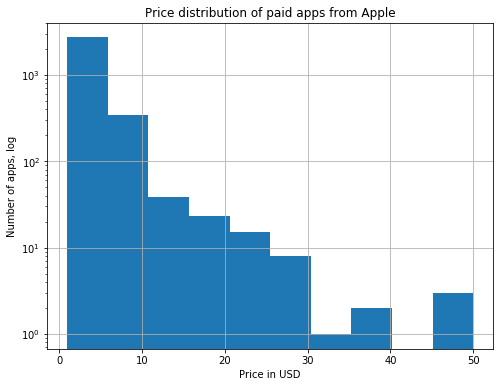

In [94]:
# Without log=True, we will get a histogram really stick to the 0 only

plt.figure(figsize=(8, 6))
plt.hist(apple_paid_apps['price_usd'], log=True)
plt.title('Price distribution of paid apps from Apple')
plt.xlabel('Price in USD')
plt.ylabel('Number of apps, log')
plt.grid()
plt.show()

From the above, we can definetely see that the highest the price is - the lower the count of the applications becomes. This leads to having really a few applications having price in the range of 30-50 USD. If I would bet I'd say that these are some kind of botique applications.

Lets try to see which are the categories with most apps and then try to find the price distribution - paid vs. free of them.

In [95]:
def generate_top_genres(data, column_name, number_of_genres):
    """
    Function to print and return a dictionary of top N genres based on their count
    """
    
    temp_top_genres = {}
    for genre, count in zip(data.groupby(column_name).size().sort_values(ascending=False).index, data.groupby(column_name).size().sort_values(ascending=False).values):
        temp_top_genres[genre] = count
        # We will get only the top 6
        if len(temp_top_genres) == number_of_genres:
            break
        
    print('Here are the top genres / categories by count of applications in the dataset\n\n')
    for key in temp_top_genres.keys():
        print(f'Genre: {key} with count: {temp_top_genres[key]}')
        
    return temp_top_genres

In [96]:
top_genres = generate_top_genres(apple_store_data, 'genre', 6)

Here are the top genres / categories by count of applications in the dataset


Genre: Games with count: 3862
Genre: Entertainment with count: 533
Genre: Education with count: 453
Genre: Photo & Video with count: 349
Genre: Utilities with count: 248
Genre: Health & Fitness with count: 180


In [97]:
top_genres

{'Games': 3862,
 'Entertainment': 533,
 'Education': 453,
 'Photo & Video': 349,
 'Utilities': 248,
 'Health & Fitness': 180}

In [98]:
def plot_genres_paid_free(data, genres_data, genre_col, price_col, rating_col, rating_count_col):
    """
    Function to plot data about the popular genres we have from the function "generate_top_genres"
    This function accepts the whole data set, the genres dictionary and 2 additional columns for more info:
    
    genre_col - column in the data set that should indicate the category
    price_col - column in the data set that should indicate the price for an app
    rating_col - column in the data set that should indicate rating (example rating from 1-5)
    rating_count_col - column in the data set that should indicate number of ratings or something similar for popularity
        
    """

    # 2 python lists storing the numbers for paid/free apps - count of them
    # a dictionary that we will use to store genre:[(mean(rating), meadian(ratings_count)), 
    #                                              (mean(rating), meadian(ratings_count))] 
    #                                        respectively for paid and free count
    
    _paid_apps = data[(data[price_col] > 0) & (data[price_col] <= 50)]
    _free_apps = data[data[price_col] == 0]
    
    
    top_genres_paid = []
    top_genres_free = []
    ratings = {}
    ratings_patches = []
   
    for key in genres_data.keys():
        paid = _paid_apps[_paid_apps[genre_col] == key]
        free = _free_apps[_free_apps[genre_col] == key]
        top_genres_paid.append(len(paid))
        top_genres_free.append(len(free))
        ratings[key] = [(paid[rating_col].mean(), paid[rating_count_col].median()),
                        (free[rating_col].mean(), free[rating_count_col].median())]
    
    
    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_subplot(111)
    ind = np.arange(len(genres_data))
    width = 0.35

    paid = ax.bar(ind, top_genres_paid, width, color='#45cea2')
    free = ax.bar(ind + width, top_genres_free, width, color='#fdd470')

    ax.set_ylabel('Number of apps')
    ax.set_title('Number of apps of top categories: Paid/Free')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(genres_data.keys())

    ratings_patches.append((mpatches.Patch(color='#45cea2', label='Paid')))
    ratings_patches.append((mpatches.Patch(color='#fdd470', label='Free')))

    current_patch = mpatches.Patch(color=np.random.rand(len(ratings) + 1, 3)[0], \
                                   label=f'Genres with their paid/free - mean rating/median ratings count')
    ratings_patches.append(current_patch)

    for genre in ratings.keys():
        paid_genre_rating = ratings[genre][0][0]
        paid_genre_rating_count = ratings[genre][0][1]

        free_genre_rating = ratings[genre][1][0]
        free_genre_rating_count = ratings[genre][1][1]

        current_patch = mpatches.Patch(color=np.random.rand(len(ratings) + 1, 3)[0], label=f'{genre}: paid: {paid_genre_rating:.2f} / {paid_genre_rating_count:.2f} - free: {free_genre_rating:.2f} / {free_genre_rating_count:.2f}')

        ratings_patches.append(current_patch)


    ax.legend(handles = ratings_patches)
    plt.grid()
    plt.show()

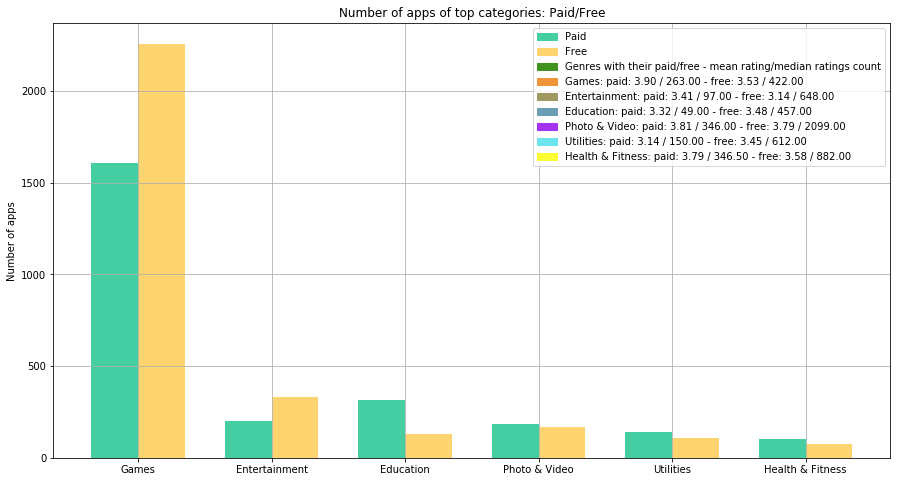

In [99]:
plot_genres_paid_free(apple_store_data, top_genres, 'genre', 'price_usd', 'user_rating_all', 'rating_count_all')

It is interesting to note that for some of the categories that we have a lot of applications about - it is really common to have more paid apps than free ones. For example the educational apps are looking to be more dominant with paid over free - same is for the health and fitness. 
On top of all the application genres seems to be the games one.

Clearly comparing the mean ratings of the paid and free applications in a category gives us a picture that some are rated higher with their paid and some with their free ones. One thing that is important though is the median value of the ratings count. For example it seems not so crazy to thing that if someone paid for an app. he would probably have reviewed it in details and give a more objective and probably high rate.
So if we look at the ratings counts total numbers - we see that for all of the categories we have gigher count of ratings compared to the paid applications in the same cateogry.

As we saw the total number of ratings does seem to be significantly higher, for the categories in their paid vs. free applications while the rating is either also showing the same pattern, or not dropping a lot.

Lets see how the count of ratings does look like on app. level and category level.

In [100]:
def plot_apps_genres_by_rating_count(data, rating_count_col, app_name_col, genre_col, N=15):
    
    
    _store_sorted = data.sort_values(rating_count_col, ascending=False)[:N]
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(16)
    
    
    plt.subplot(2, 1, 1)
    plt.barh(_store_sorted[app_name_col], _store_sorted[rating_count_col], color='#45cea2')
    plt.title('Top 15 application by ratings count')
    plt.xlabel('Ratings count')
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.barh(_store_sorted[genre_col], _store_sorted[rating_count_col], color='#fdd470')
    plt.title('Top 15 applications genres')
    plt.xlabel('Ratings count')
    plt.grid()
    plt.show()

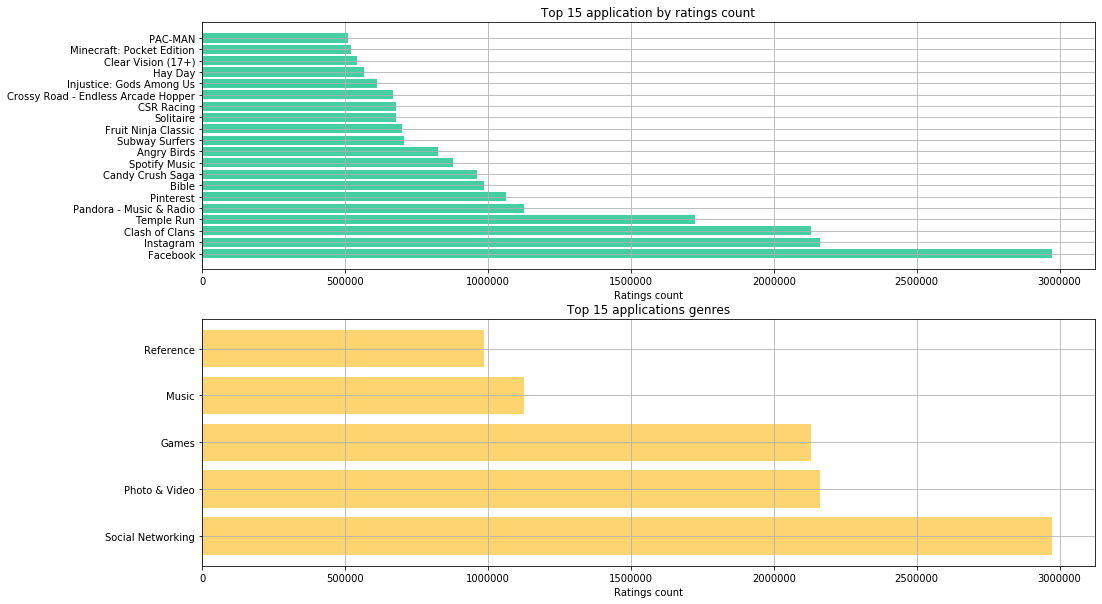

In [101]:
# Top 15 apps by ratings count only

# app_store_sorted = apple_store_data.sort_values('rating_count_all', ascending=False)[:15]
#app_store_sorted_all = apple_store_data.sort_values('rating_count_all', ascending=False)

plot_apps_genres_by_rating_count(apple_store_data, 'rating_count_all', 'app_name', 'genre', N=20)

So clearly we see some famous names in the application by names plot and alos a dominant category  - Social Networking. Nowadays this is not a surprise as a lot of the people around the world are using social networks and communicate through them.

So we clearly cannot observer all of the columns we have, what we can do though is to pick some of the column we suspect may be interesting and see how the rating count and maybe rating itself is changing. We already saw that for the free applications in the top categories we tend to see much higher usage that the paid ones. Even if we have a higher rating - it could be a strange situation where you have 10 reviews only and 8 of them are 5, which is not really accurate for an app success. That is why we are also aiming to see a decent rating count also - high ratings count and a good rating would mean that an application is doing good.

So we can try to see this for a couple of columns like:
    
    
###### content_rating

###### sup_devices_num

###### display_screenshots_num

###### sup_lng_num

In [102]:
def plot_data_combined(data, columns, column_descr, rating_col, rating_count_col):
    """
    This is a function that is using variables: content_rating, sup_devices_num, display_screenshots_num, sup_lng_num
    to visualize some entities count per variable and also some comparasions to the rating of the apps and their total
    number of ratings.
    
    The function takes as input:
    
    data - the full data set
    columns - the columns in the scope
    column_descr - some column meaningful description - will be used in plot title, etc.
    rating_col - column indicating the rating for the data set
    rating_count_col - column indicating rating count / popularity or something like that
    
    WARNING:
        The function is not completely tested with different type of columns as input,
        so this version might be working on 100% with mostly numeric ones only!
    
    There is no output of the function.
    
    Note that the plot colors are randomly generated, so if you find something not quite good visible try a restart
    
    """
    
    assert len(columns) == len(column_descr)
    
    for idx in range(len(columns)):
        current_column = columns[idx]
        current_column_descr = column_descr[idx]
        
        if 'price' in current_column:
            #
            # Price is handled in here
            #

            fig = plt.figure()
            fig.set_figheight(11)
            fig.set_figwidth(15)

            plt.subplot(2, 2, 1)
            temp_data = data
            plt.scatter(temp_data[rating_count_col], temp_data[current_column], color=np.random.rand(3,))
            plt.title('Rating count vs. Price')
            plt.xlabel('Rating count')
            plt.ylabel('Price')
            plt.grid()

            plt.subplot(2, 2, 2)
            temp_data = data
            plt.scatter(temp_data[rating_col], temp_data[current_column], color=np.random.rand(3,))
            plt.title('User rating vs. Price')
            plt.xlabel('Rating')
            plt.ylabel('Price')
            plt.grid()
        else:
            fig = plt.figure()
            fig.set_figheight(11)
            fig.set_figwidth(15)

            plt.subplot(2, 2, 1)
            temp_data = data.groupby(current_column).size().sort_values()
            plt.barh(temp_data.index, temp_data, color=np.random.rand(3,))
            plt.title(f'App count by {current_column_descr}')
            plt.ylabel(f'{current_column_descr}')
            plt.grid()

            plt.subplot(2, 2, 2)
            temp_data = data
            plt.scatter(temp_data[rating_count_col], temp_data[current_column], color=np.random.rand(3,))
            
            # Check for numeric values of the current column
            if np.isreal(temp_data[current_column].iloc[0]):
                plt.axhline(y=temp_data[current_column].mean(), label=f'{current_column} mean', c='red', linestyle="--")
            
            plt.axvline(x=temp_data[rating_count_col].mean(), label='rating count mean', c='red', linestyle="--")
            plt.title(f'Rating count vs. {current_column_descr}')
            plt.xlabel('Rating count')
            plt.ylabel(f'{current_column_descr}')
            plt.legend()
            plt.grid()

            plt.subplot(2, 2, 3)
            temp_data = data
            plt.scatter(temp_data[rating_col], temp_data[current_column], color=np.random.rand(3,))
            
            if np.isreal(temp_data[current_column].iloc[0]):
                plt.axhline(y=temp_data[current_column].mean(), label=f'{current_column_descr} mean', c='red', linestyle="--")
            
            plt.title(f'Rating vs. {current_column}')
            plt.xlabel('Rating')
            plt.ylabel(f'{current_column}')
            plt.legend()
            plt.grid()
            
    plt.show()

No handles with labels found to put in legend.


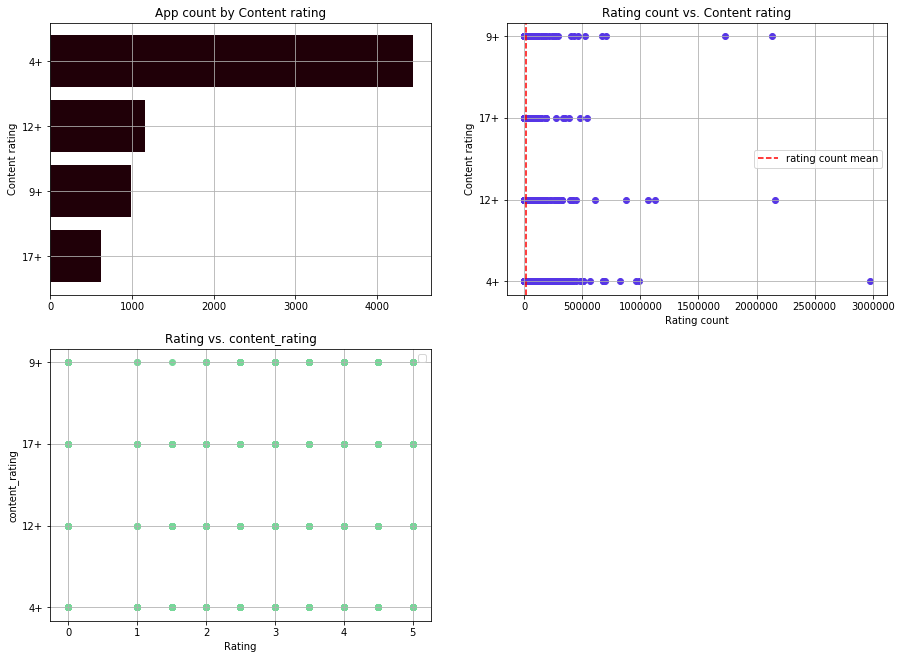

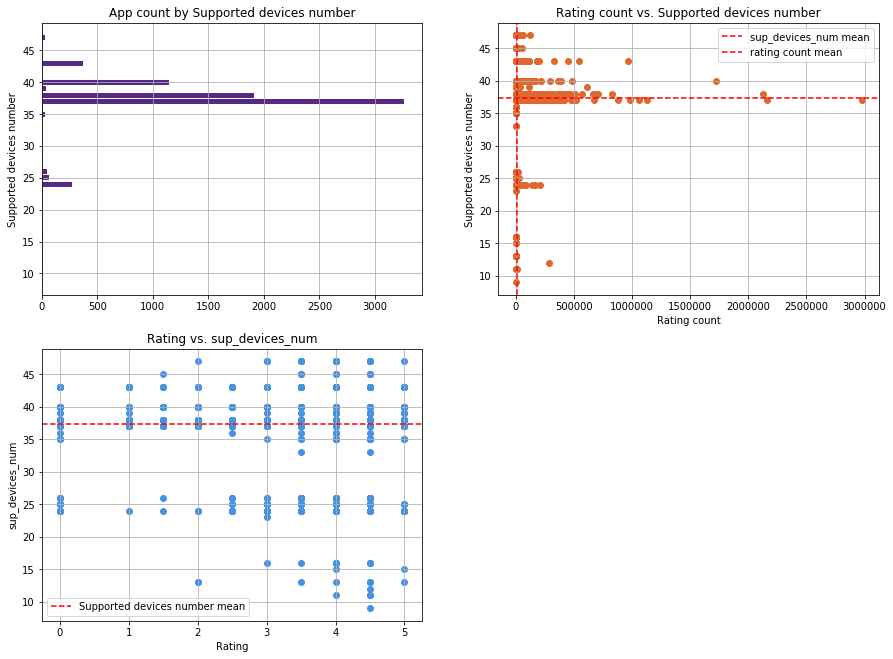

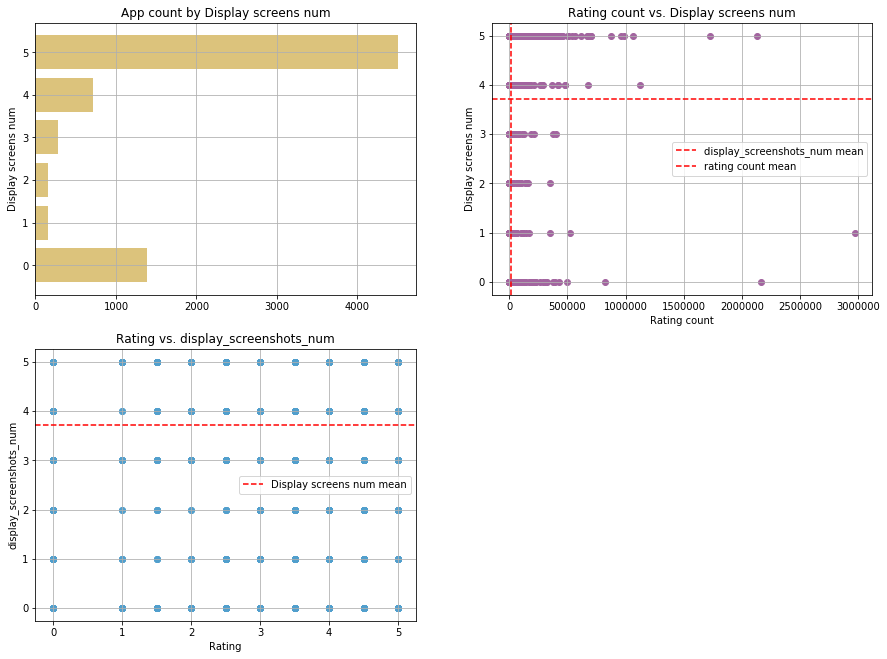

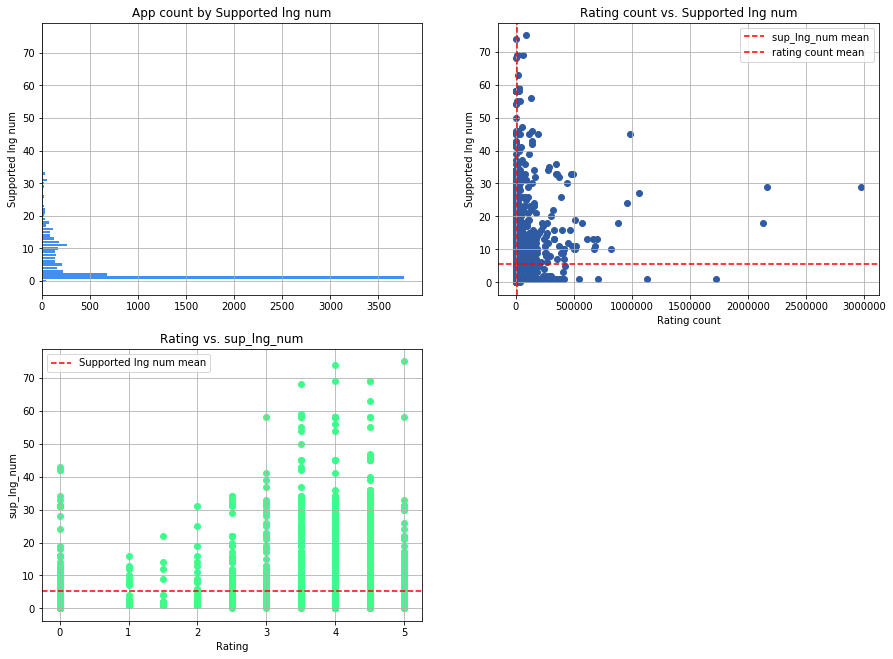

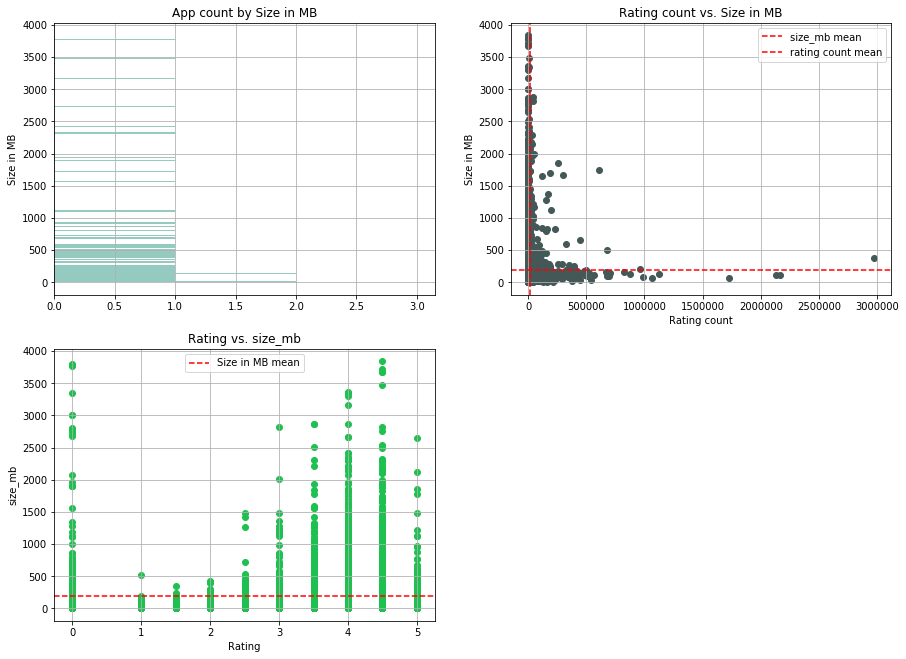

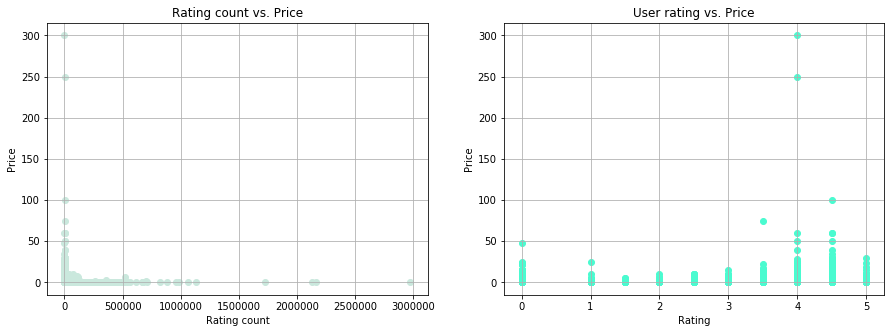

In [103]:
plot_data_combined(apple_store_data, 
                       ['content_rating', 'sup_devices_num', 'display_screenshots_num', 'sup_lng_num', 'size_mb', 'price_usd'],
                       ['Content rating', 'Supported devices number', 'Display screens num', 'Supported lng num', 'Size in MB', 'Price USD'],
                       'user_rating_all',
                       'rating_count_all')

So I have created a combined function, which will give us a series of plots showing different type of information. As an example I have started this one first for the whole dataset we have.

Even though some of the plots do not give us any information when we start this function on the whole set of data, we can still spot something. Starting with the prices that are at end - we can actually validate what we have said earlier that the free apps are looking to be much more popular, the same price compared to the ratings of the apps however - shows us that even if an app costs us something - it is highly likely that it can have not too bad rating as well.

Supported languages seem not to be great distributed in the full dataset - we see that the vast majority of it is around 0-1, which is not a surprise - not everyone can develop such a successful application that will be supporting different kind of languages. On the same page however - we can see that it is highly likely that if we have more supported languages - we will have a better rating for the app - looking at ratings >= 3 for example in this plot.

The display screenshots count rating plot do not tell us a lot in this version, but what we see in there for the popularity (rating count) is that it could be that the higher the number of the screenshots is - more popular the app can become.

We see almost the same like what we have for the display screenshots number for the number of supported devices. In there the popularity seems to be significantly better for the apps with higher number of supported devices and partially the same is valid for the rating. Cumulatevly we can see also that the average number of supported devices is around the popularity top spot - 37.5.

The content rating plots are limited to only 2 for a reason. This data can be interpreted not really good in some scenarios. For example we see that 4+ is dominant in the count out there, but this cateogry is actually fully covered by the rest also. We can talk about backwards compatibility in here, but the popularity levels do not give us too many reasons to talk about it in here.

Lets try to use this function to plot some data agains something else. I am definitely thinking about using it for checking the result on a dataset sorted by popularity from both the directions. What that means is to try and see something like the top 3500 apps by popularity and then the worst 3500, of course the number can be different, these are just picked based on the dataset size.

In [104]:
#Lets first sort the data in a variable in here

apple_store_data_sorted = apple_store_data.sort_values('rating_count_all', ascending=False)

In [105]:
apple_store_data_sorted.head(5)

,app_name,size_mb,price_usd,rating_count_all,rating_count_version,user_rating_all,user_rating_version,current_version,content_rating,genre,sup_devices_num,display_screenshots_num,sup_lng_num,vpp_licensing
17,Facebook,371.818359,0.0,2974676,212,3.5,3.5,95.00,4+,Social Networking,37,1,29,1
591,Instagram,108.675781,0.0,2161558,1289,4.5,4.0,10.20,12+,Photo & Video,37,0,29,1
1561,Clash of Clans,111.081055,0.0,2130805,579,4.5,4.5,9.24,9+,Games,38,5,18,1
810,Temple Run,62.867188,0.0,1724546,3842,4.5,4.0,1.60,9+,Games,40,5,1,1
8,Pandora - Music & Radio,124.208984,0.0,1126879,3594,4.0,4.5,8.40,12+,Music,37,4,1,1


In [106]:
apple_store_data_sorted.tail(5)

,app_name,size_mb,price_usd,rating_count_all,rating_count_version,user_rating_all,user_rating_version,current_version,content_rating,genre,sup_devices_num,display_screenshots_num,sup_lng_num,vpp_licensing
5518,全国一斉性格テストDX,17.230469,0.00,0,0,0.0,0.0,1.6,17+,Entertainment,40,0,1,1
5527,盗墓之王-寻龙秘事,198.627930,0.00,0,0,0.0,0.0,1.0,12+,Games,37,5,2,1
5529,Bibi & Tina: Pferdeabenteuer,594.125977,2.99,0,0,0.0,0.0,1.2,4+,Games,38,5,1,1
7934,S ou SS,4.600586,2.99,0,0,0.0,0.0,1.0,4+,Education,38,5,1,1
4379,みんなのお弁当 by クックパッド ~お弁当をレシピ付きで記録・共有~,48.803711,0.00,0,0,0.0,0.0,1.4,4+,Food & Drink,37,0,1,1


So this should work to give us something like the first 3500 rows would be the better applications agains the last 3500. 

We can try our function against these.

No handles with labels found to put in legend.


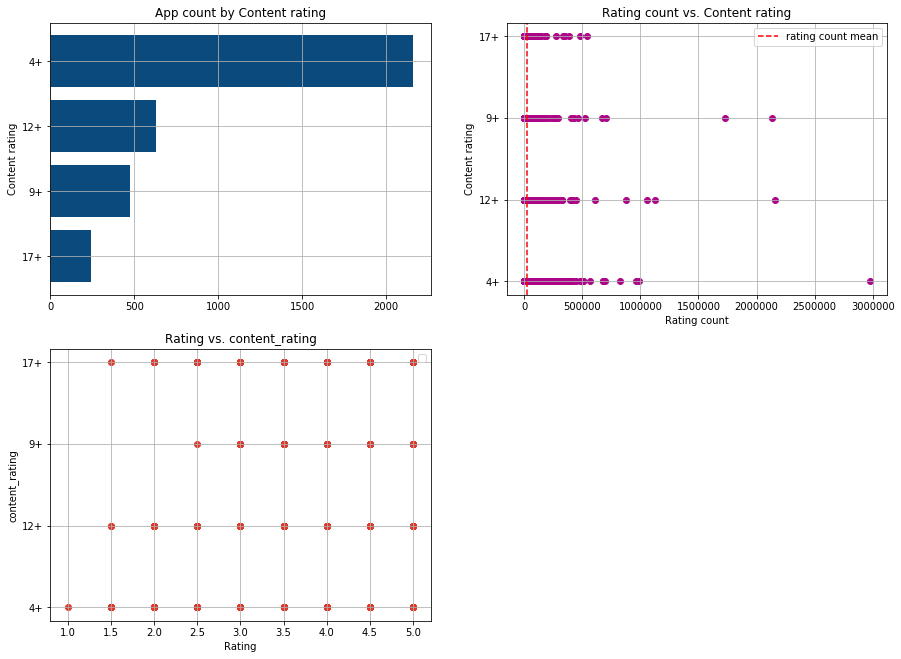

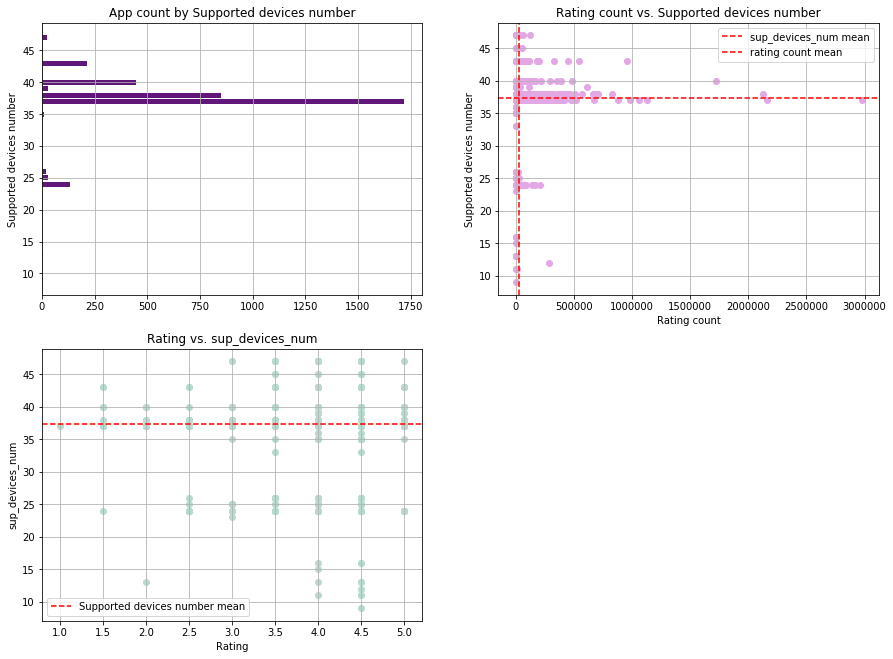

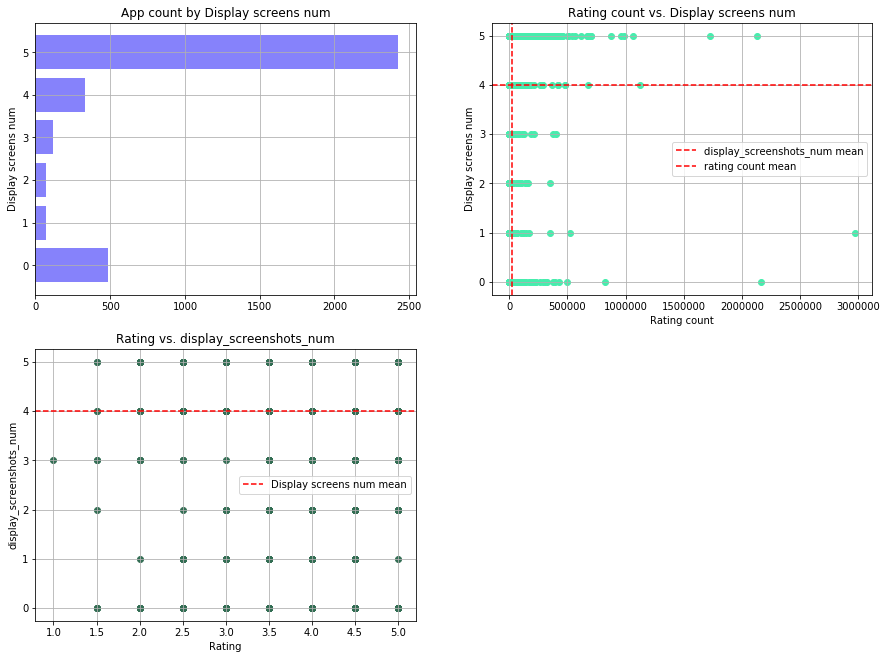

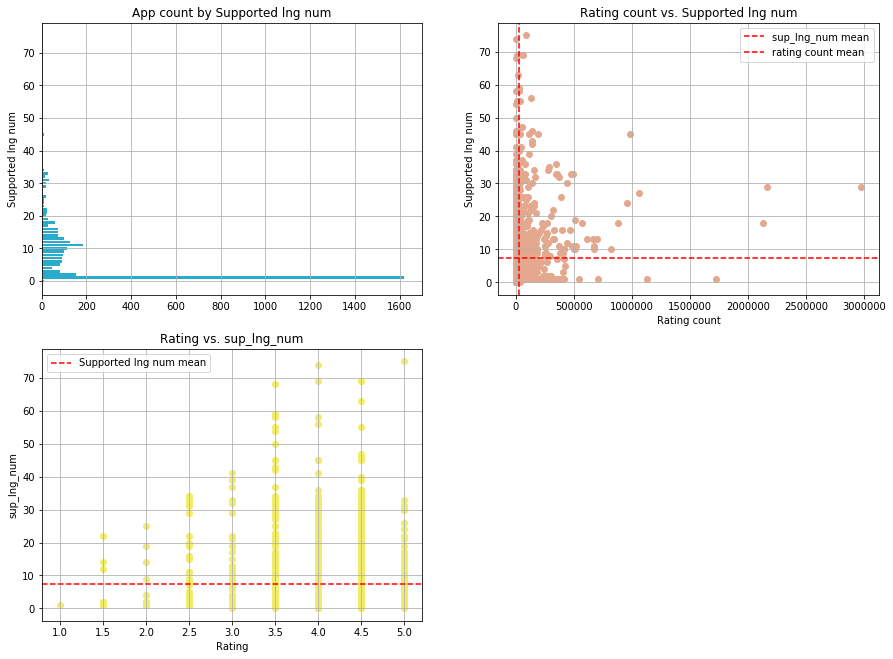

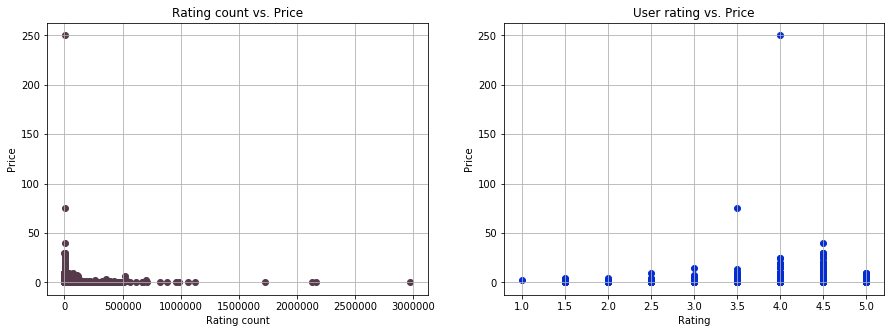

In [107]:
plot_data_combined(apple_store_data_sorted.iloc[:3500], 
                       ['content_rating', 'sup_devices_num', 'display_screenshots_num', 'sup_lng_num', 'price_usd'],
                       ['Content rating', 'Supported devices number', 'Display screens num', 'Supported lng num', 'Price USD'],
                       'user_rating_all',
                       'rating_count_all')

Honestly it does not look really different from what we saw on the whole dataset and for this amount of TOP data it could be not such a surprice. Lets see the other one.

No handles with labels found to put in legend.


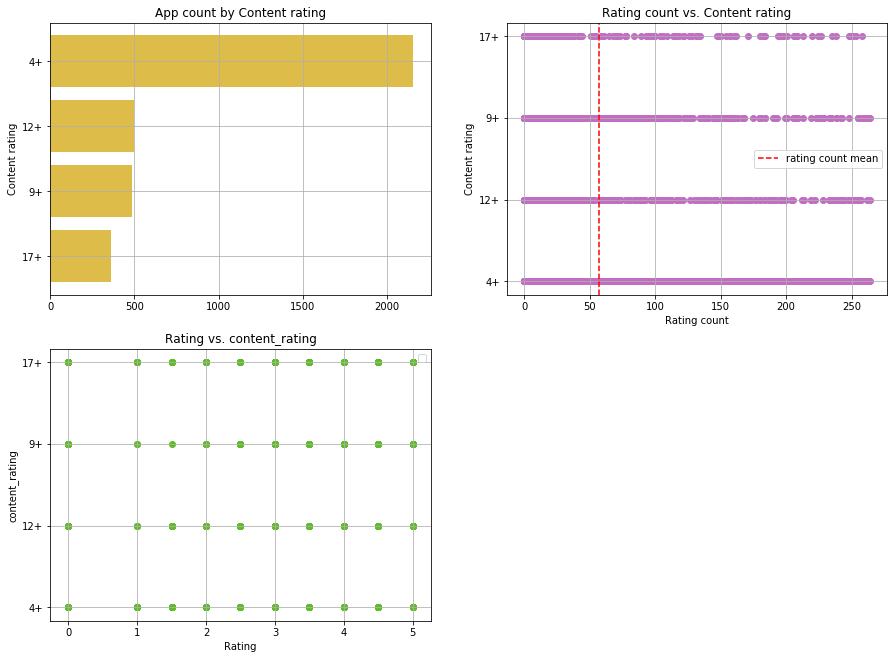

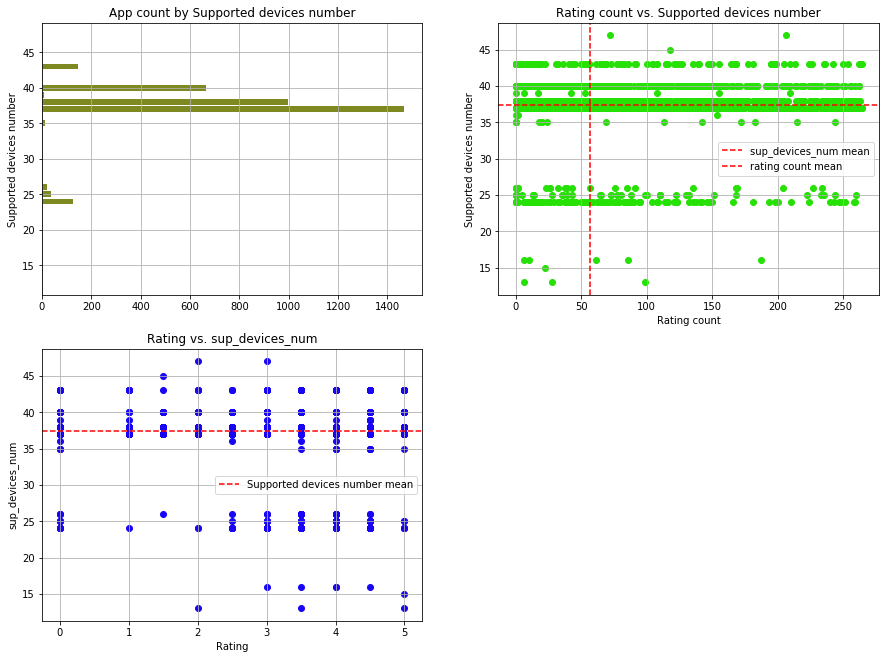

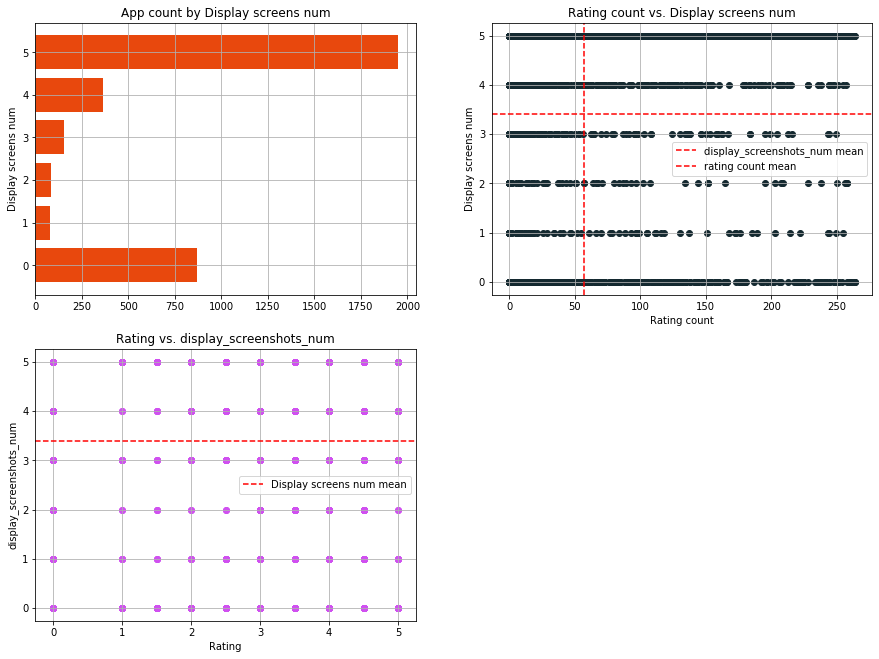

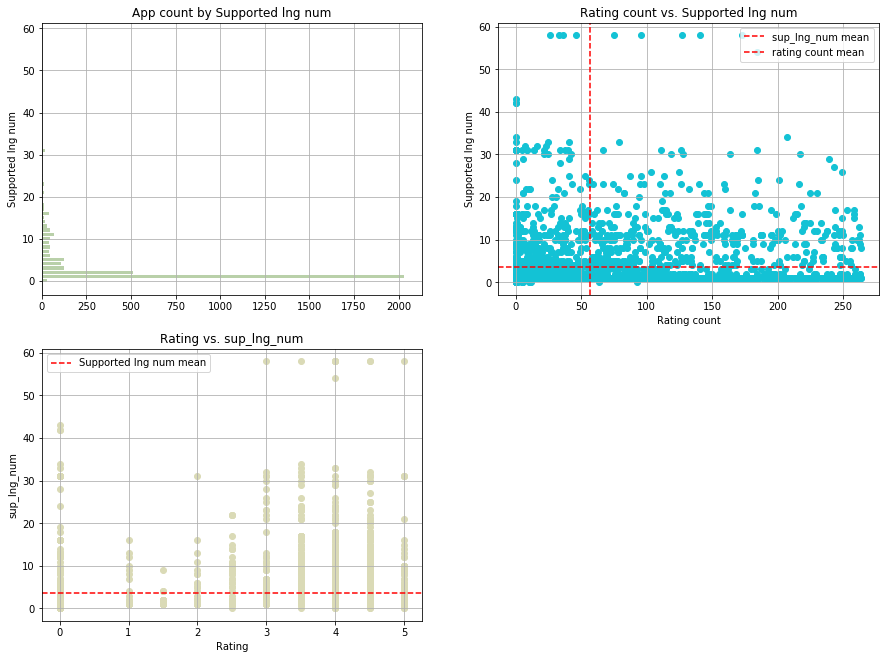

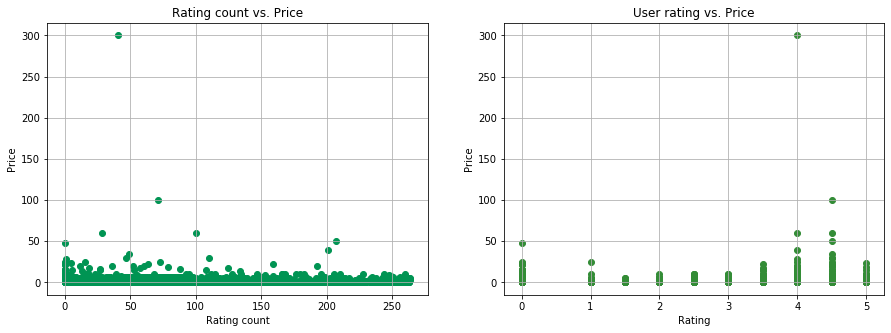

In [108]:
plot_data_combined(apple_store_data_sorted.iloc[-3500:], 
                       ['content_rating', 'sup_devices_num', 'display_screenshots_num', 'sup_lng_num', 'price_usd'],
                       ['Content rating', 'Supported devices number', 'Display screens num', 'Supported lng num', 'Price USD'],
                       'user_rating_all',
                       'rating_count_all')

So it is actually not really different again and we can try to intrpret this.

If we take a look closely and compare, we can somehow notice that the plots are either reamining mostly the same, or are just in like a plateau and do not seem to have any indications or patterns.

For example the plot with ratings versus number of supported languages - in both of last executions we see that there is at least slight increase in the rating when we have higher number of supported languages. For the rating count vs. price we can also see that the increasing patter of popularity seems to always be mostly concentrated around the 0 and little above.
Number of supported devices is also showing us similarities and the same is valid for the content ratings.

<br>
<br>
<br>

So if we try to answer our initial questions now - we cannot actually guruantee on something based on the analysis we saw. What we can do though is to say something about our results.

It is clear that most of the little patterns spotted are being reproduced in the best and also the worst applications. While the dataset is not really well rich and also we could have done better on the clearing, we saw that for most of the applications the same "rules" are valid, no matter their popularity. We've used the popularity only, since it does not make a lot of sense to give opinion on an app rated with 5 if it has only 1 user, I do not think that this is a successful mobile application.

What we can say based on the analysis is that the most popular category seems to be the social networking together with photo and video and games. This is not a surprise (as already stated) in the modern world that we live in. We can communicate, make friends and find jobs through social networking, so it is quite deserved to be on the top spot.

We've also saw that the price DOES MATTER. If one want to bring success to an app he definitely needs to think of a proper pricing schema or whether or not the app will be paid at all. Of course we do not exclude the recommendation of developing paid applications - there are really really high quiality apps which do need to be paid, but this needs to be selected carefully. We did not gone deeper on the price only and try to develop a pricing model, but it could be something to be looked after on this one.

We have also saw these little patters about the user experience related things. For example it not a surprise that you will bring some success if you support more devices, more languages, more number of screenshots and probably other that we do not se in this dataset. Even though the patters are not blowing, we saw that the data is making this little note (at least the one we have), so it is a really good advice if one want to bring some success to take care of these things and bring the best he can.



<br>
<br>
<br>

### 3. Comparing initial results with additional data set

We have done some observations on the Apple store data set and it is a good idea to try and validate this now with the additional set that we have prepared - the one for Google Play store.

First of, just to be clear what we are searching for - we saw the top categories by popularity and also saw that the price can influence a lot on the ratings given, installs, popularity, etc. so it is a plus if you make your app free. Another thing that we have partially saw is that the user experience and support matter - if you support bigger number of devices, languages and screenshots for your app - it is highly likely that it will be more successful.

The reversed on all of the above, would eventually mean that your application can be not so popular and successful. It is also good to mention that even though we have prepared equally both the data sets - they are not quite the same, in fact the Google one is bigger - we have around 7000 vs. around 10000, which can impact our observations in some way. We haven't checked fully the second data set, but from the data preparation steps, it is clear that we have differences for the features in both the sources. That said - we will try to search "in the same way" with similar things to what we already saw bring app to success and we will use whatever we have in the Google data set. 

So lets see how this one looks like.

In [109]:
google_play_store

,app_name,category,rating,num_of_reviews,size_mb,installs,price_usd,content_rating,genre,last_update,current_version,android_version
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,1.811981e+01,10000,0.0,0+,Art & Design,2018-01-07,1.00,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,1.335144e+01,500000,0.0,0+,Art & Design;Pretend Play,2018-01-15,2.00,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.296967e+00,5000000,0.0,0+,Art & Design,2018-08-01,1.20,4.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,2.384186e+01,50000000,0.0,13+,Art & Design,2018-06-08,NaN,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.670288e+00,100000,0.0,0+,Art & Design;Creativity,2018-06-20,1.10,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,5.054474e+01,5000,0.0,0+,Education,2017-07-25,1.48,4.1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.433228e+00,100,0.0,0+,Education,2018-07-06,1.00,4.1
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.059906e+00,1000,0.0,0+,Medical,2017-01-20,1.00,2.2
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,-9.536743e-07,1000,0.0,17+,Books & Reference,2015-01-19,NaN,NaN


Clearly in this data set we have installs, which is another really useful thing for the popularity that we can use. It differs from the number of reviews, as you can download an app and immediately delete or forget it without doing anything else, so we will try to use as much features as we can.

Lets try first the function we have for the top genres based on their overall count in the data set.

In [110]:
top_genres_genre = generate_top_genres(google_play_store, 'genre', 8)

Here are the top genres / categories by count of applications in the dataset


Genre: Tools with count: 797
Genre: Entertainment with count: 553
Genre: Education with count: 506
Genre: Business with count: 406
Genre: Medical with count: 392
Genre: Productivity with count: 369
Genre: Personalization with count: 367
Genre: Lifestyle with count: 361


In [111]:
top_genres_cat = generate_top_genres(google_play_store, 'category', 8)

Here are the top genres / categories by count of applications in the dataset


Genre: FAMILY with count: 1809
Genre: GAME with count: 947
Genre: TOOLS with count: 798
Genre: BUSINESS with count: 406
Genre: MEDICAL with count: 392
Genre: PRODUCTIVITY with count: 369
Genre: PERSONALIZATION with count: 367
Genre: LIFESTYLE with count: 362


So in here we have 2 columns for the category - genre + category and the results based on both of these look a little bit different. The second one tends to have higher count points in the top spots, so that probably means we have lower amount of available categories in the "category" column. We see these "FAMILY", "TOOLS" ones which are really not so specific, but also see some of the ones that were present in the first data set - "GAME", "SPORTS" and some others which may be really commong to the "Utilities" one  that we had in Apple store.

Lets try to use the plotting function now - it consumes the data from the dictionary created above, so we can even play a little with it and see the result for both the features - "genre" + "category"


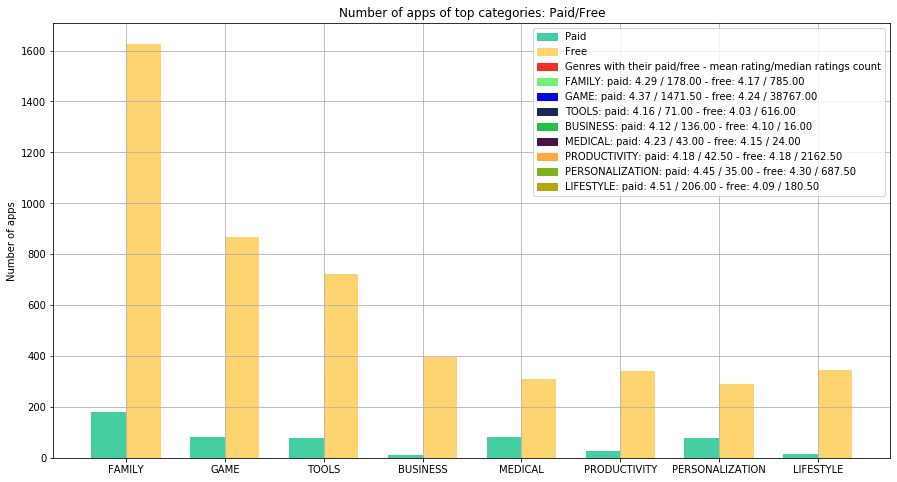

In [112]:
plot_genres_paid_free(google_play_store, top_genres_cat, 'category', 'price_usd', 'rating', 'num_of_reviews')

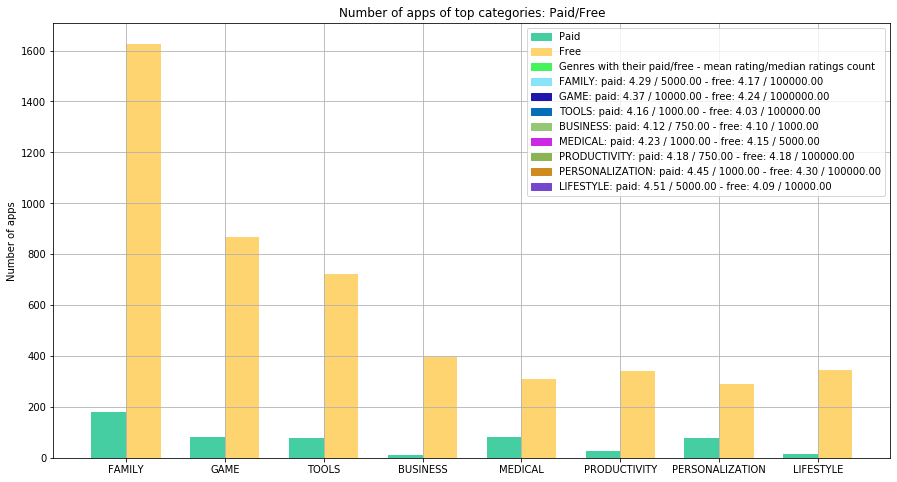

In [113]:
plot_genres_paid_free(google_play_store, top_genres_cat, 'category', 'price_usd', 'rating', 'installs')

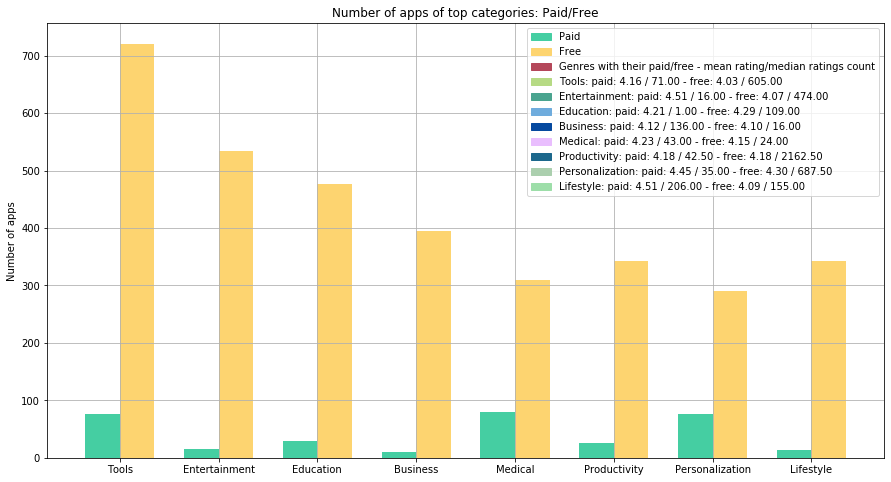

In [114]:
plot_genres_paid_free(google_play_store, top_genres_genre, 'genre', 'price_usd', 'rating', 'num_of_reviews')

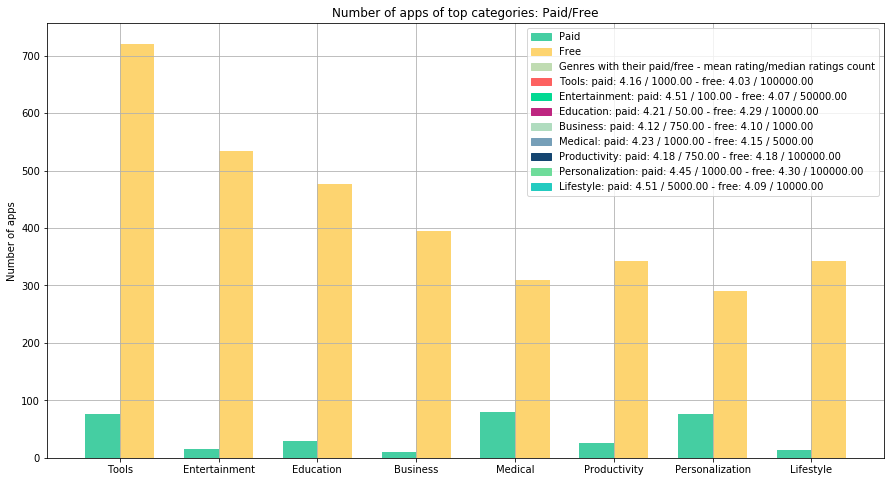

In [115]:
plot_genres_paid_free(google_play_store, top_genres_genre, 'genre', 'price_usd', 'rating', 'installs')

We again tend to see, even stronger, that the free apps are dominant in the data we have. Even though we see that the mean rating seems to be higher when an application is paid - the popularitiy indicators - meadian of either installs or number of reviews is higher for the free ones. Again it is normal if you pay for something - to review it in details and be sure that this is the right app for you - in such case you usually give a really positive rating.

On top of everything of that - if we can intrepret it - if you are developer or a marketing specialist or someone that has interest in what drives a mobile application to success. You should really carefully decide whether or not your app will be be paid. If it is free you probably have some additional space for errors/quality, which will be covered from the fact that the users are just downloading the app for free. On the other side, when one pays for an app to download - usually checks the application in details and ensures on its quality and functions based on reviews, ratings, info, etc. So if an application is paid - it needs to be really good.

Lets check our next plot function - for the exact applications and genres/categories by their popularity column.

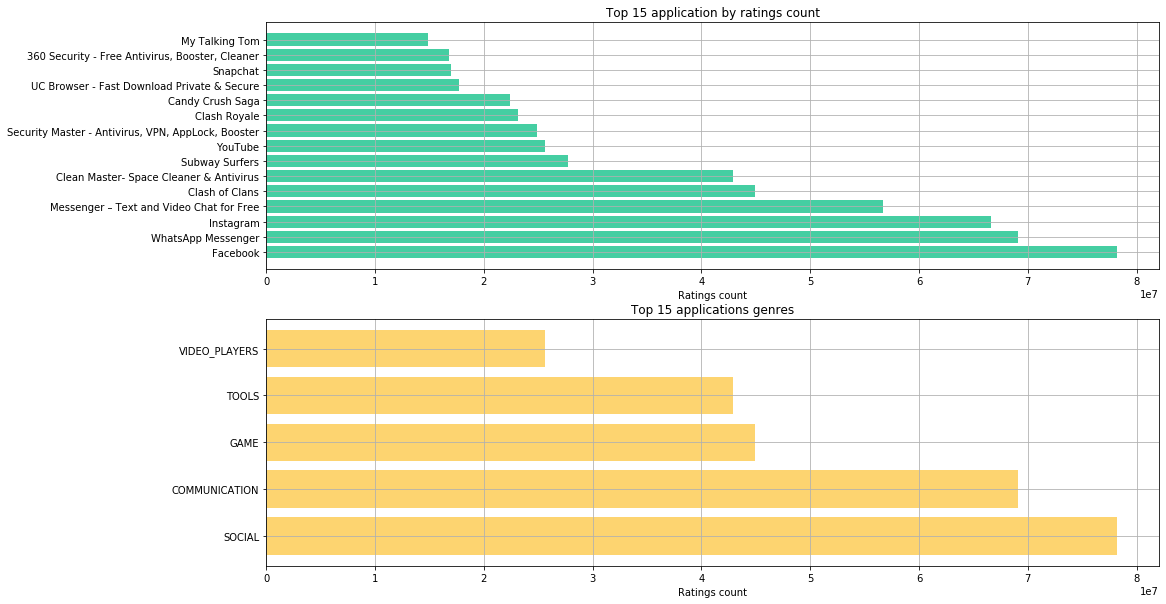

In [116]:
plot_apps_genres_by_rating_count(google_play_store, 'num_of_reviews', 'app_name', 'category')

So the trend is clear and looks really close to what we have in the Apple store. The top applications and category/genre seems to be the following a sequence of social networking, communications, games, etc. We found something really similar in the first data set and we have already described it back then - so we can now validate it in here only and proceed further.

Lets try to start the general plotting function with a set of features from this data set and see the result.

No handles with labels found to put in legend.
C:\Users\ptsvetkov\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


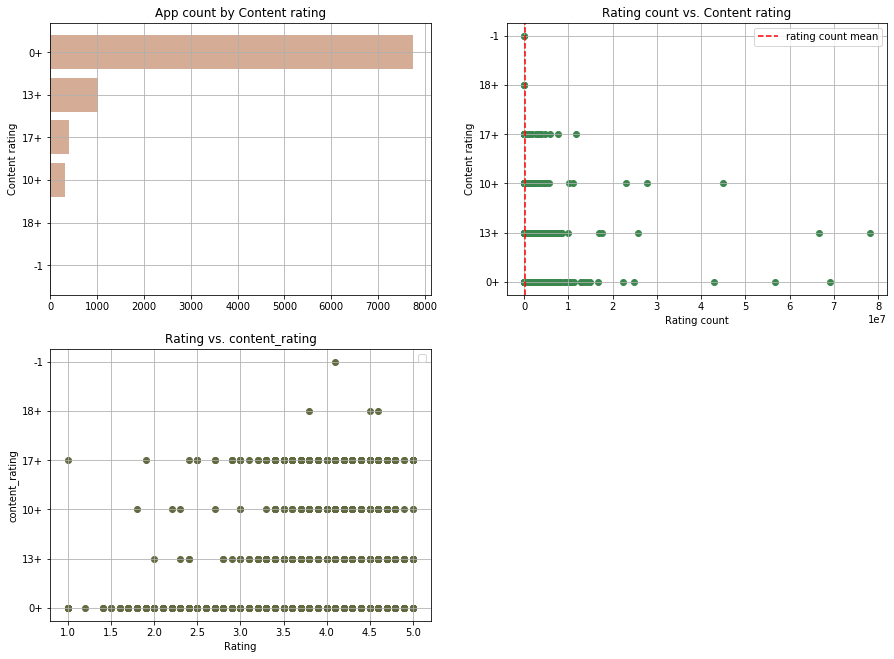

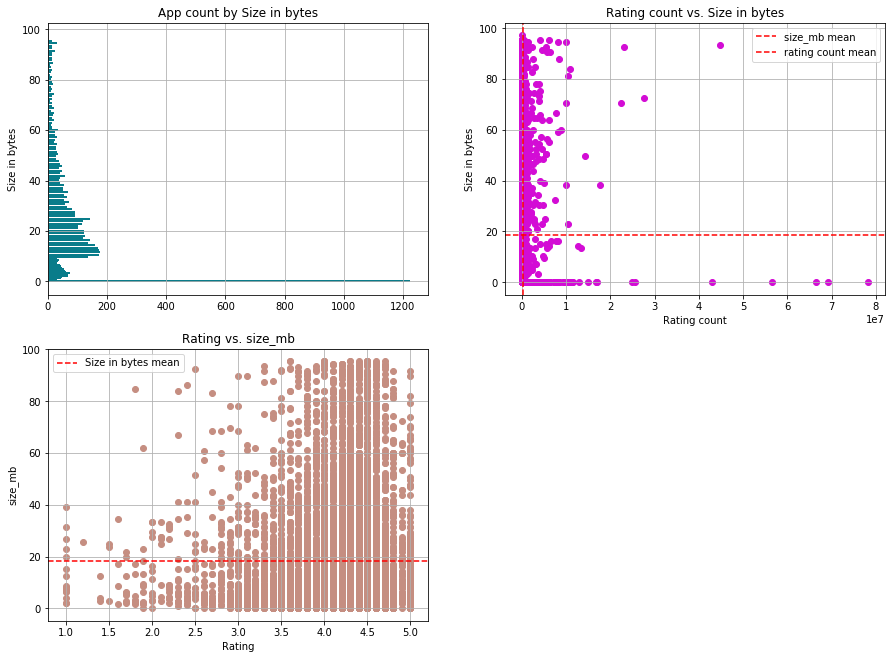

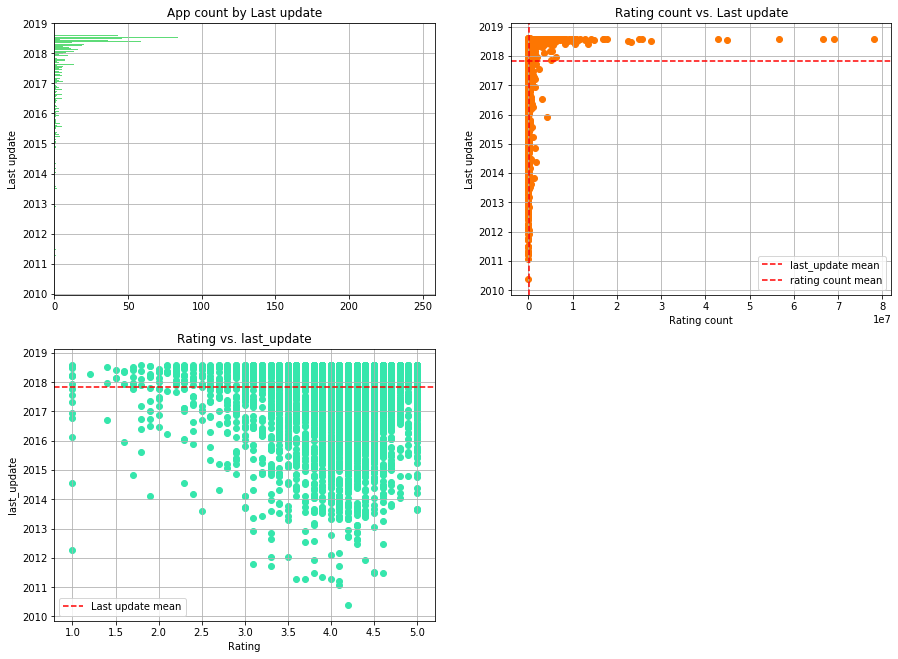

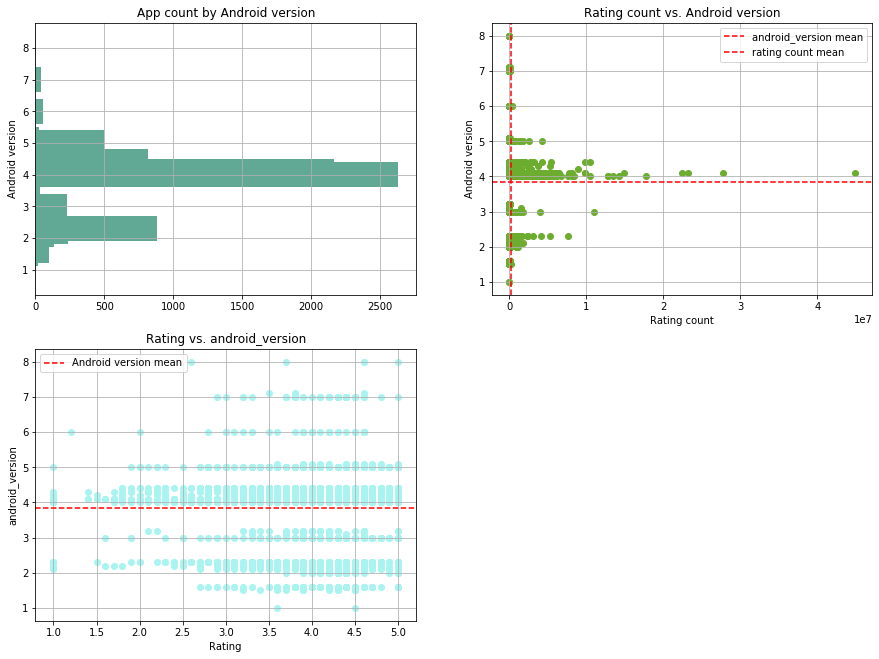

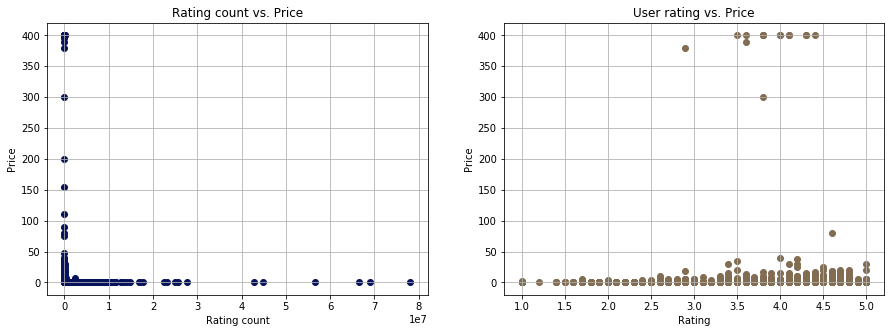

In [117]:
plot_data_combined(google_play_store, 
                   ['content_rating', 'size_mb', 'last_update', 'android_version', 'price_usd'],
                   ['Content rating', 'Size in bytes', 'Last update', 'Android version', 'Price USD'],
                   'rating',
                   'num_of_reviews')

No handles with labels found to put in legend.


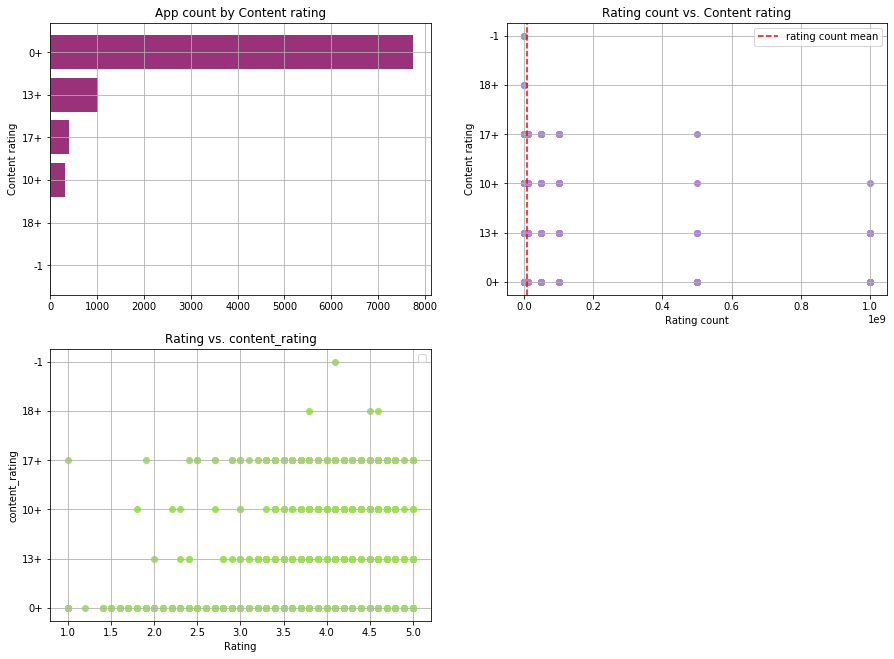

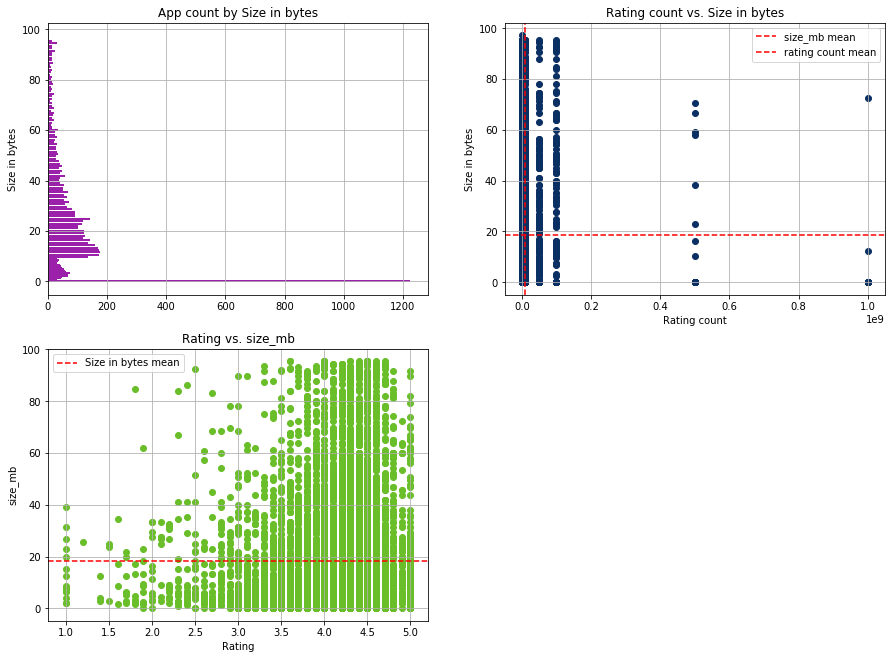

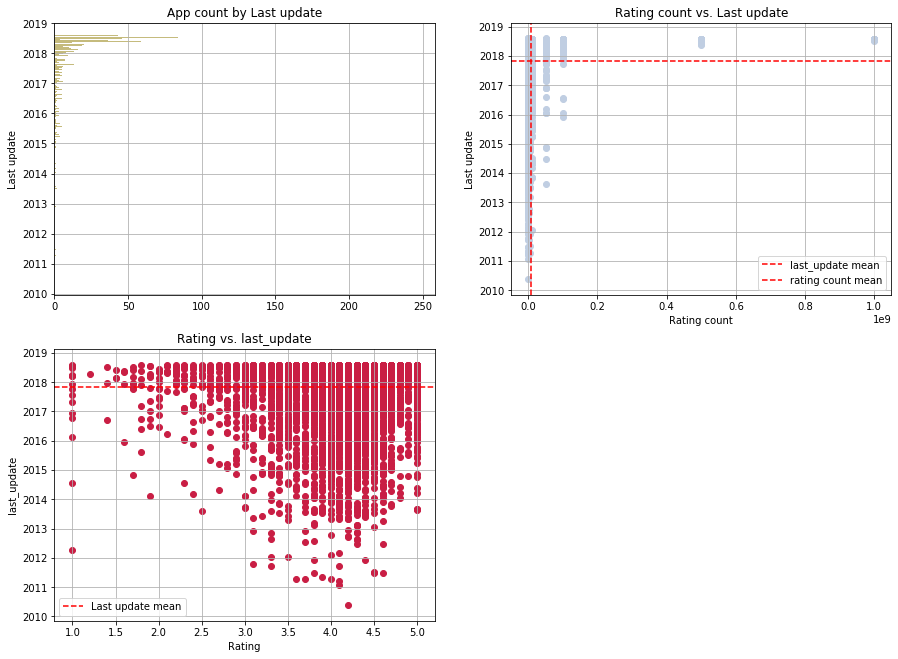

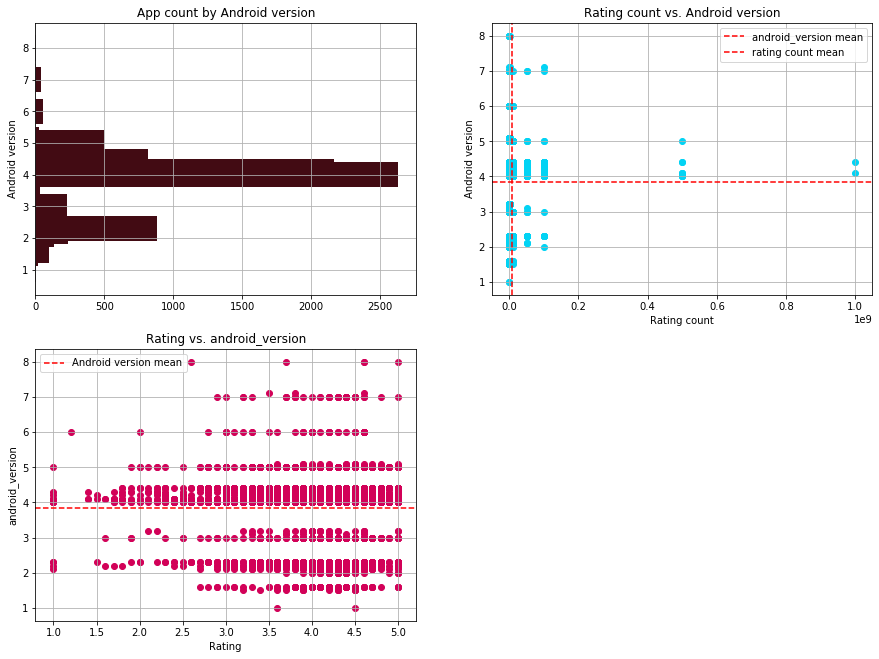

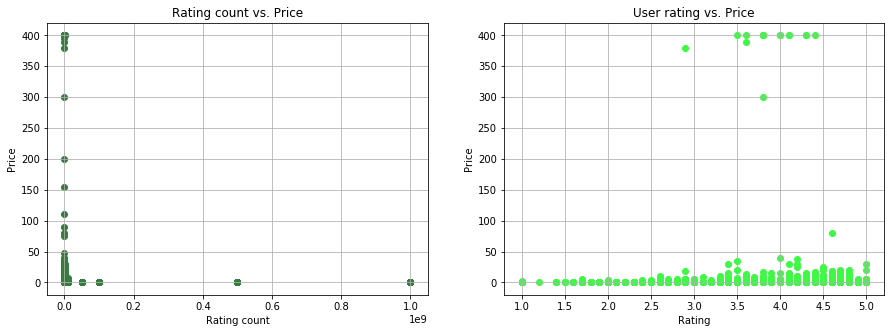

In [118]:
plot_data_combined(google_play_store, 
                   ['content_rating', 'size_mb', 'last_update', 'android_version', 'price_usd'],
                   ['Content rating', 'Size in bytes', 'Last update', 'Android version', 'Price USD'],
                   'rating',
                   'installs')

In [119]:
google_play_store_sorted = google_play_store.sort_values('num_of_reviews', ascending=False)

No handles with labels found to put in legend.


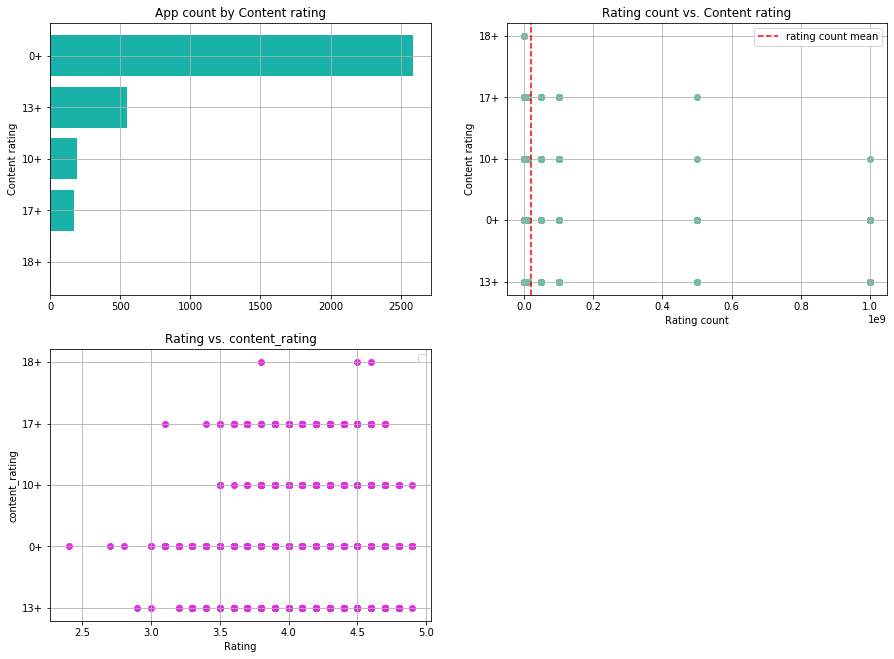

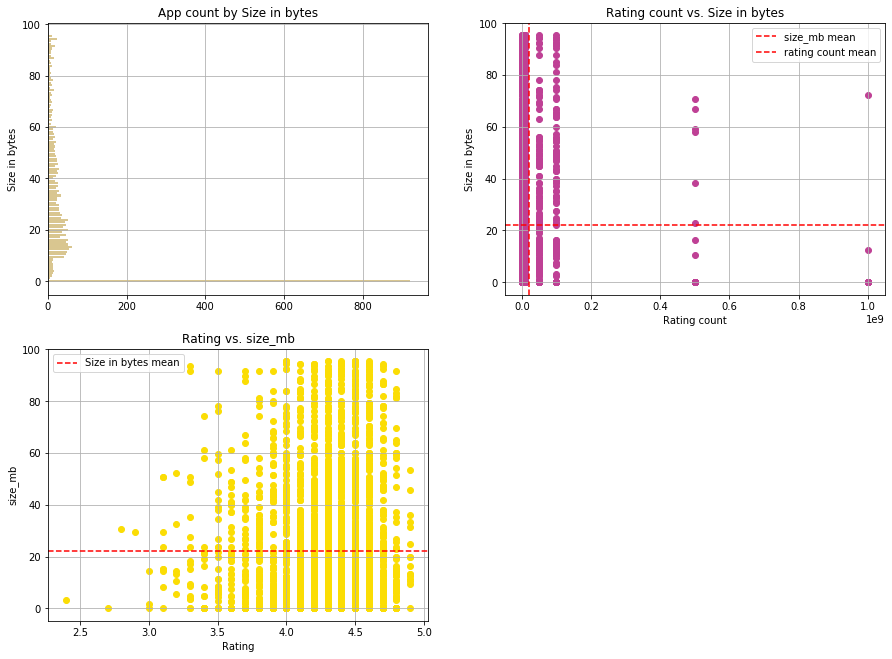

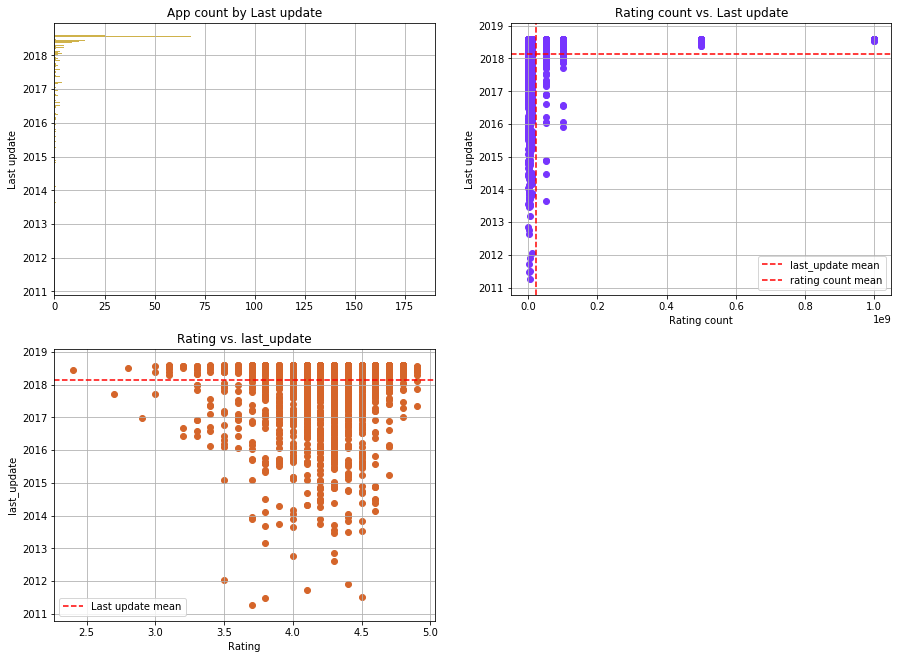

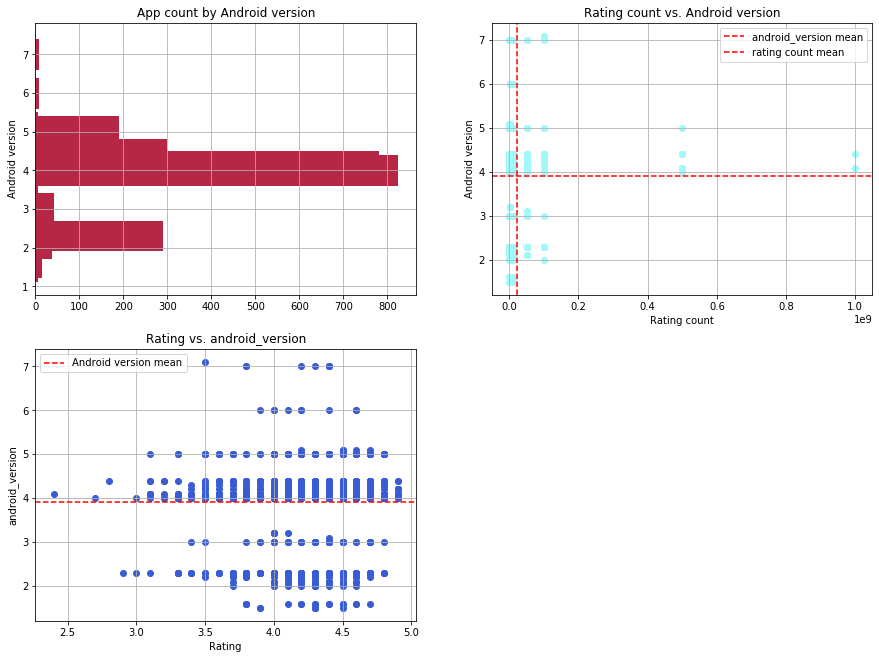

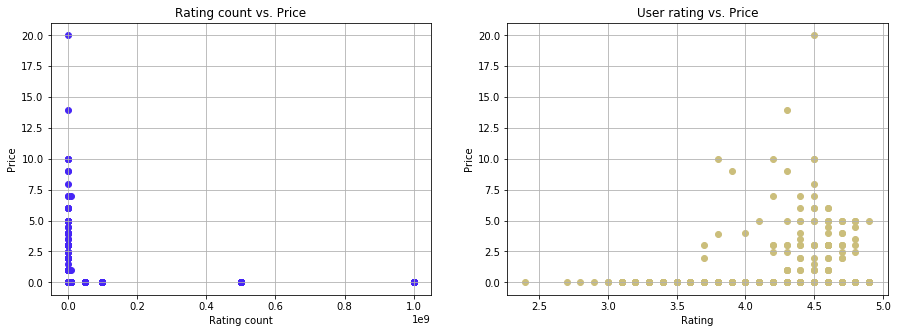

In [120]:
plot_data_combined(google_play_store_sorted.iloc[:3500], 
                   ['content_rating', 'size_mb', 'last_update', 'android_version', 'price_usd'],
                   ['Content rating', 'Size in bytes', 'Last update', 'Android version', 'Price USD'],
                   'rating',
                   'installs')

No handles with labels found to put in legend.


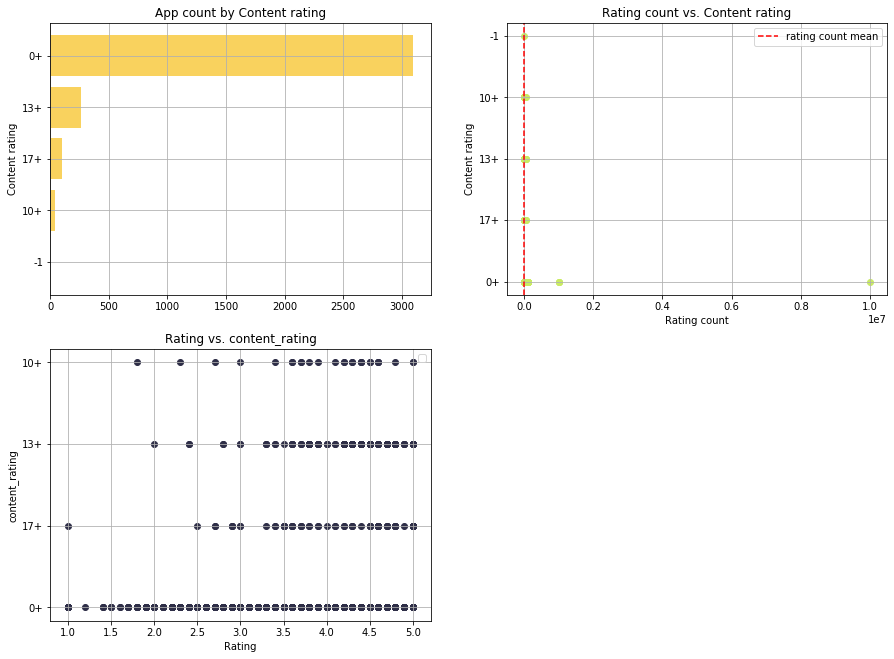

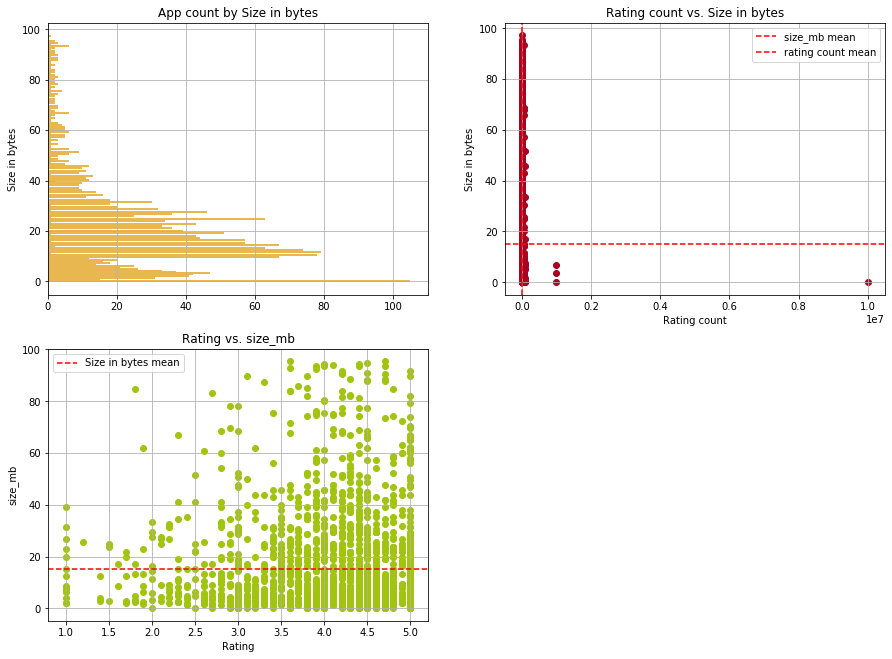

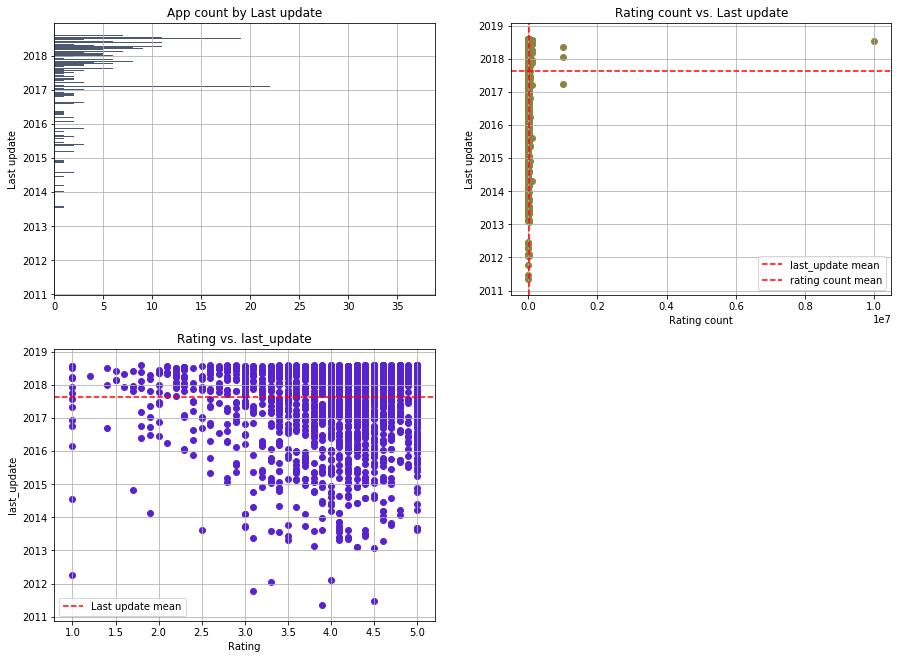

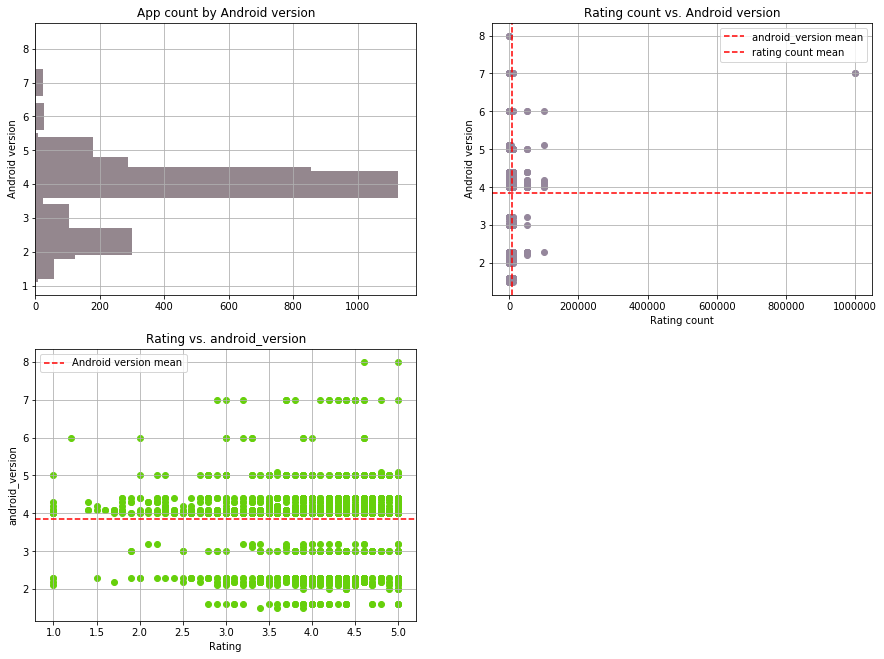

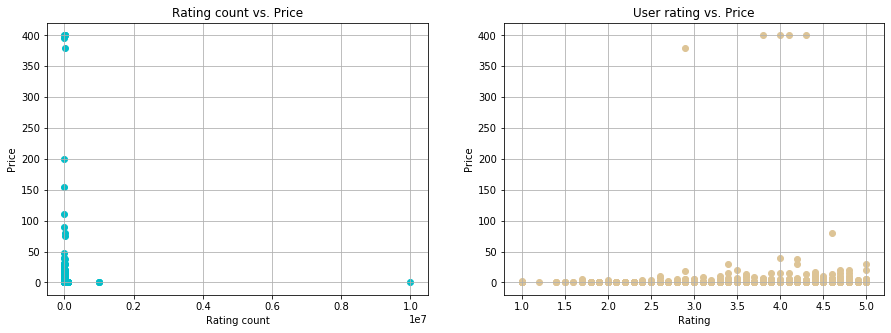

In [121]:
plot_data_combined(google_play_store_sorted.iloc[-3500:], 
                   ['content_rating', 'size_mb', 'last_update', 'android_version', 'price_usd'],
                   ['Content rating', 'Size in bytes', 'Last update', 'Android version', 'Price USD'],
                   'rating',
                   'installs')

In [122]:
google_play_store_sorted = google_play_store.sort_values('installs', ascending=False)

No handles with labels found to put in legend.


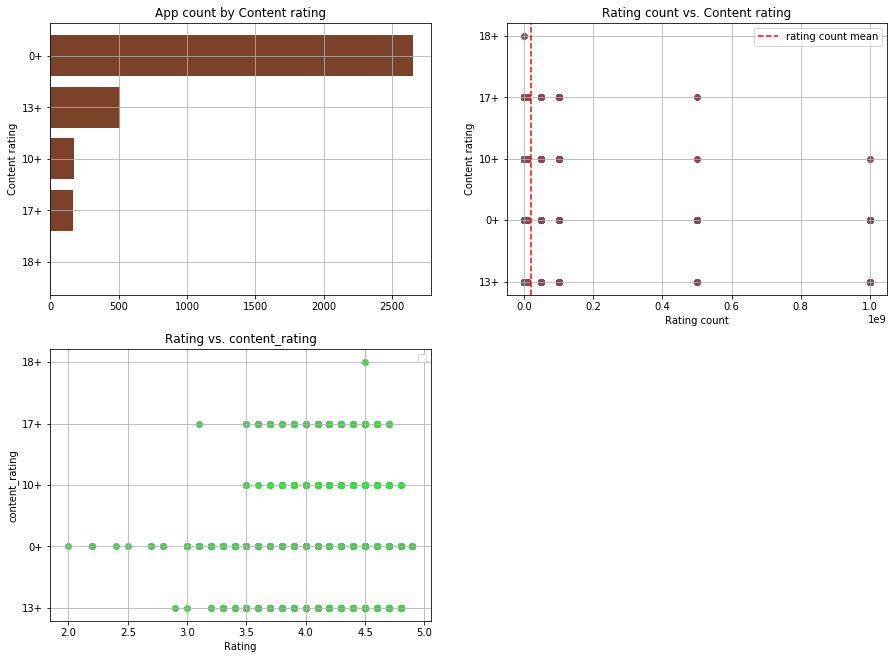

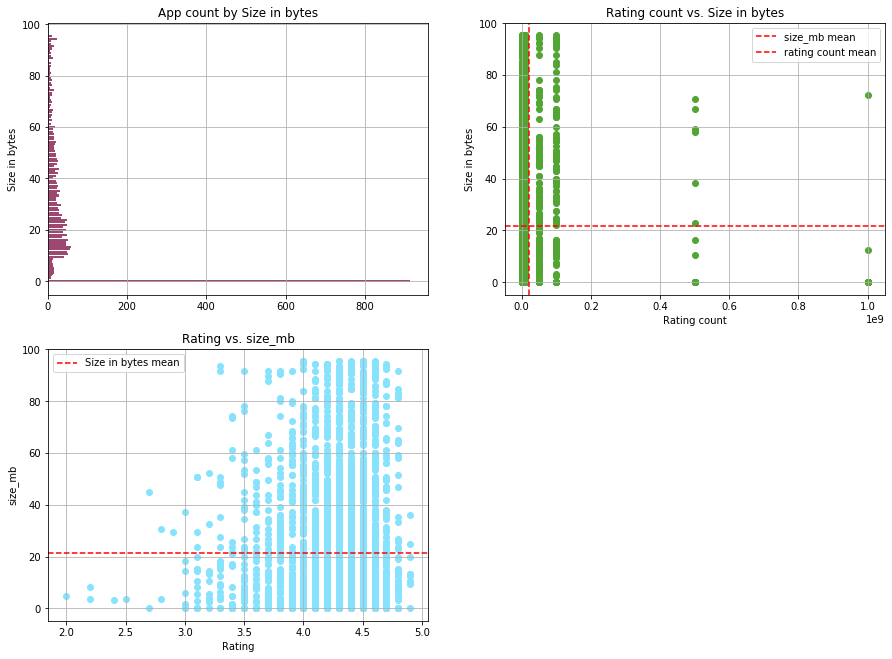

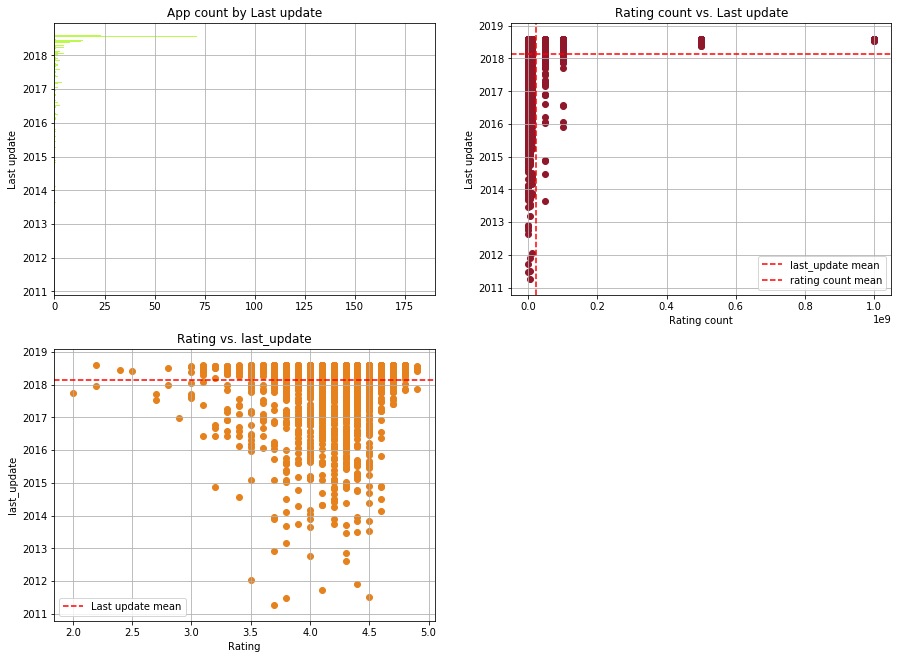

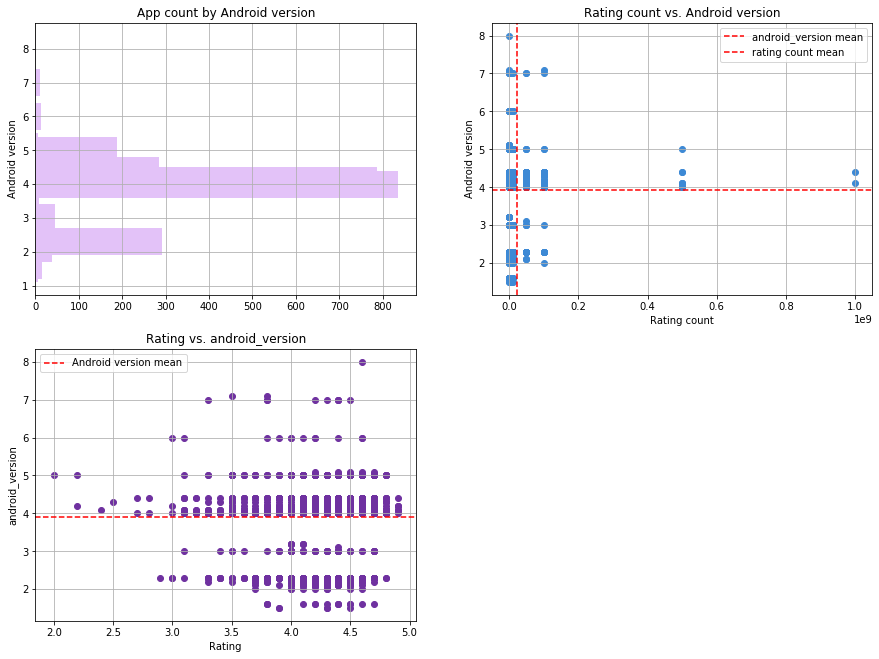

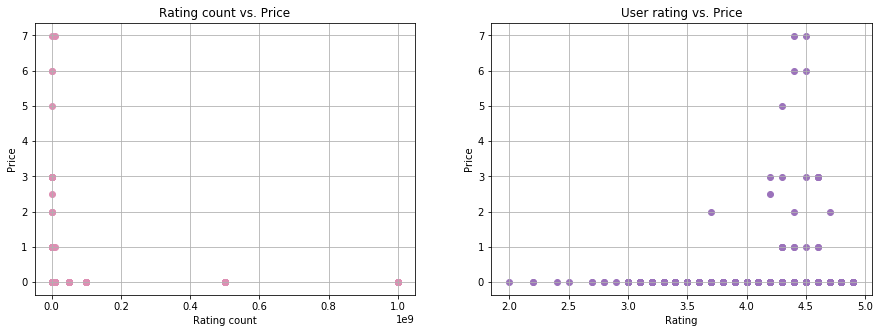

In [123]:
plot_data_combined(google_play_store_sorted.iloc[:3500], 
                   ['content_rating', 'size_mb', 'last_update', 'android_version', 'price_usd'],
                   ['Content rating', 'Size in bytes', 'Last update', 'Android version', 'Price USD'],
                   'rating',
                   'installs')

No handles with labels found to put in legend.


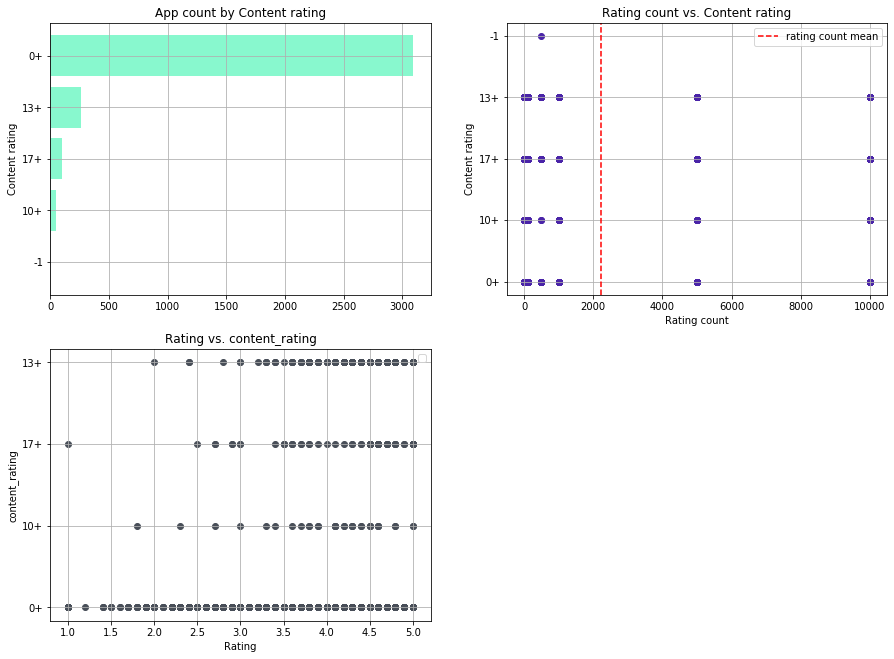

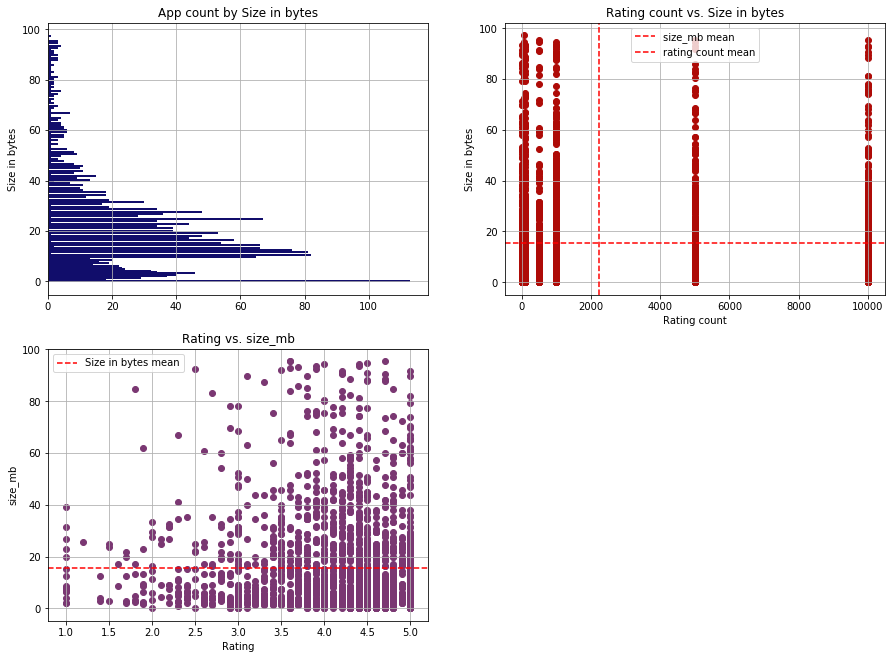

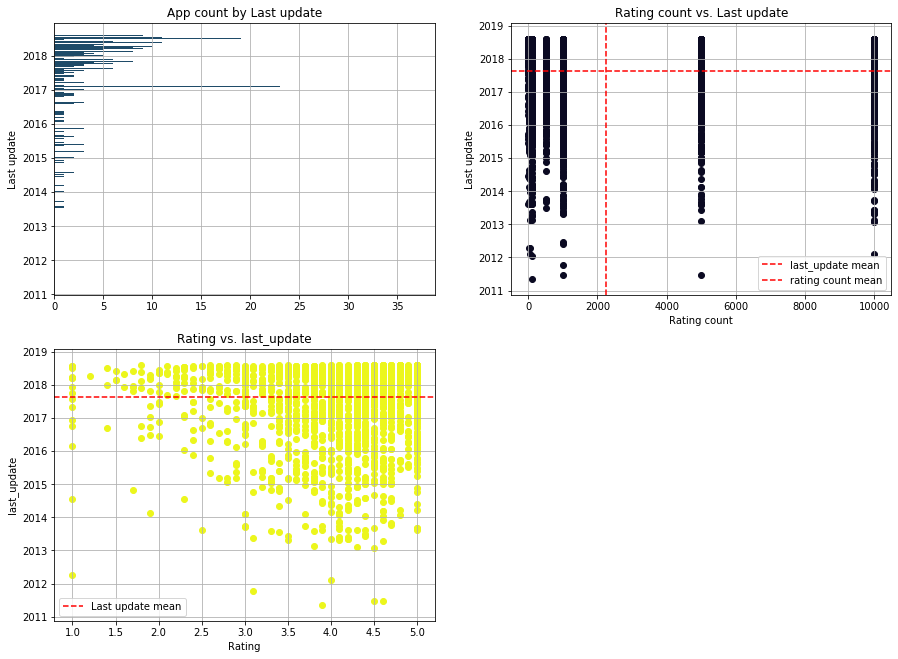

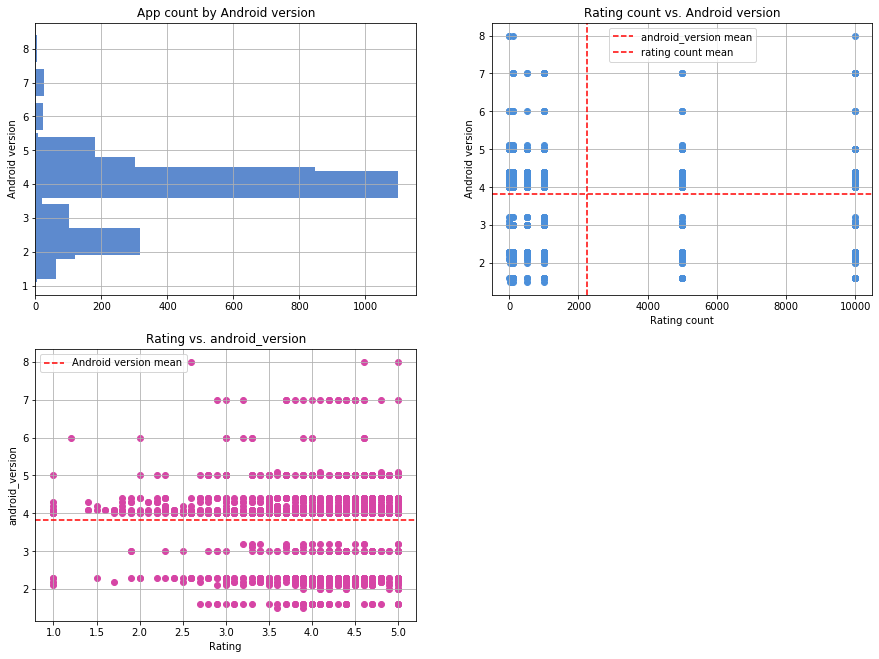

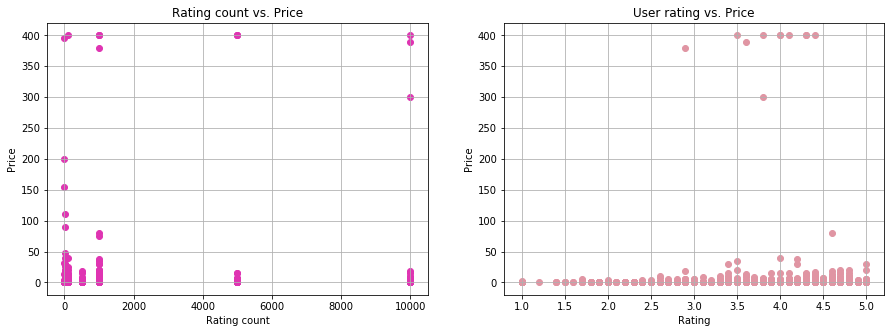

In [124]:
plot_data_combined(google_play_store_sorted.iloc[-3500:], 
                   ['content_rating', 'size_mb', 'last_update', 'android_version', 'price_usd'],
                   ['Content rating', 'Size in bytes', 'Last update', 'Android version', 'Price USD'],
                   'rating',
                   'installs')

<br>
<br>
<br>

So we clearly cannot do a full validation and compare between the 2 data sets, as the two data sets are having different columns, not only different, but the columns in the Google store source are missing almost everything that we have used for the final plot function on the Apple store data.

That being said we cannot fully validate what we have said based on the analysis on the Apple store data set. In there we have saw that the support is really important and also the user experience in some way. We cannot confirm or reject that on about the Google store since we are missing data about these, but also we cannot guruantee that these are leading to an absolute success.

In the reversed direction we didn't managed to get a lot from the same plots on the features from the Google store data. What we clearly saw however is that the size and last update date tend to have a positive effect on the rating if increasing, but is not looking the same way for the popularity. However if we trust the rating in here - we can kind of say that this is something really closely related to the user experience and the support. If you an application is developed with a lot of features and really stable, supporting different type of devices, languages, etc. - it will probably have a higher size.

Last update date seems to have a positive effect on the rating also and this is also understandable, since if an application is often updated - it is probably having a good support and is not left in the wild at the markets.



At the end, for all of the observations that we have done - we can definitely say that they do have something in common. For example the price seems to have quite similar patters in both the data sets and the same is valid for the most popular applications and categories. This is totally normal as probably the hottest application are available on all of the markets available out there.

<br>
<br>
<br>


### 4. Summary

So if we go back and try to answer the question we've asked at the beginning - the situations seems to be quite complex. The reason is that it appears not to be that easy to determine what drives the application success in a lot of details.

Some time was spent on cleaning the data and also preparing some re-usable functions for both the data sets. At the end we saw that there are some little patters and things we can get from the information at a first glance.

If we aim to drive an application to success or contribute to an already existing app in a possitive manner we can for sure do something. We saw that the price really does matter. Nowadays there are a lot of way on making money and sometimes it may not be a win-win if you put non deserved price for an application. We saw that for both the stores the vas majority of applications are free and the top ones are also recognized to be free, also the popularity seems to be much higher out there for the free apps, which is normal.

We have also saw that sometimes the support of an app and the user experience can improve an application. For example if we have a higher amount of supported languages, screenshots, devices at all - it is highly likely that an app will be much more popular and sometimes with a higher rating.

Moving to the Google store data set, we didn't got the same results, since most of the features used on the Apple data set were missing in there. However we saw that there are some details of the apps in there that may have a positive effect on the rating if increasing. An interesting point was the size which is in that scope and for that we can go into a direction which is again linked to the support of functions, options, etc. and the overall user experience - once these are improved and included to an app - the size is also increasing usually. 

### 5. Improvement of this article

While we do not dig deeper into 1 feature from the data sets in here, I have tried to describe the basics of what we should look for and how the success signals may look like. This article is definetely not going deep into trying to predict and exact success of an application or something like that. However we saw that even with some basic analysis + some clean and prepared data - we can esaily visualize some results and quickly understand what is happening between a number of features.

We must also highligh some things which may be improved working on top of this article, as this might appear into someone more precise interest at some point.

We have talked about and  looked at 2 data sets about the mobile applications market. For a more precise analysis, it could be a good idea to focus only on one of these and try to pick only a couple of the columns initially available. Once this is done, a work can be done in order to spot some correlations between any of the features or something like that. Doing that it is possible that at some point a model can be built, which can somehow try to predict a success, only rating, only popularity or something else. 

Of course there are also a lot of other questions that can be asked about a data set for mobile applications. For example we had a lot of version details in the Google store data, so we can try to understand how is the application version related to the android version, if there is any relation at all.

We can also try to observer and model the price. Trying to focus only and see how we can determine in the best way an eventual price for an application. This can be really important for a newly coming applications from developers, or for an applications that are planning to release a PRO version or something like that.

There are also some additional files which are not used in here - for a detailed description on the Apple store applications and also about the reviews from the Google Play store. These can be used for a further analysis.

### 6.Resources used

[Google Play store data and description](https://www.kaggle.com/lava18/google-play-store-apps)

[Apple store data and description](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps)